In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.animation import FuncAnimation
import os
import pickle
from astropy.convolution import convolve, Gaussian1DKernel, Box1DKernel
import pdspy.modeling as modeling


%matplotlib inline

In [2]:
# get all model data
with open ('../grid_metadata/corefull.txt', 'rb') as fp:
    core= pickle.load(fp)
with open ('../grid_metadata/cubefull.txt', 'rb') as fp:
    cube = np.array(pickle.load(fp))
with open ('../grid_metadata/cubefull.txt', 'rb') as fp:
    nancube = np.array(pickle.load(fp))
    
# x values (wavelengths) - 500 values, in normal space
with open ('../grid_metadata/xvals.txt', 'rb') as fp:
    xvals = pickle.load(fp)   

In [3]:
with open ('../grid_metadata/cubefull.txt', 'rb') as fp:
    infcube = np.array(pickle.load(fp))

In [4]:
# fix -infs: powerlaw cutoff
for i in range(len(cube)):
    if -np.inf in cube[i]:
        a = cube[i].tolist()
        a.reverse()
        ind = len(a)-a.index(-np.inf)
        x1 = xvals[ind]
        y1 = cube[i][ind]
        for j in range(ind):
            cube[i][j]=(100*(np.log10(xvals[j]/x1)))+y1
            
# nan cutoff for means            
nancube[nancube<-42]=np.nan

In [5]:
feat=[5,16,35,36]
noise=[12,25,45,71]
both=[0,8,46,62,68]

In [6]:
def orig_SED(fluxvals):
    fig,ax=plt.subplots(1,figsize=(12,9))
    # water feature -- there are features in water ice spectrum at 2.941 and 3.105 microns
    plt.axvline(x=np.mean([np.log10(2.941),np.log10(3.105)]),c='r',linestyle=":",alpha=0.7,label="H20 feature")
    # silicate feature at 10 microns
    plt.axvline(x=np.log10(10.),c='r',linestyle="--",alpha=0.7,label="silicate feature")    
    ax.plot(np.log10(xvals), fluxvals,c='black',label="original SED",alpha=0.7)
    plt.xlim(-1.2,4.2)
    plt.legend()
    plt.ylabel("log of Flux Density (mJy)")
    plt.xlabel("log of λ (μm)")
    plt.show()

In [7]:
noise[3]

71

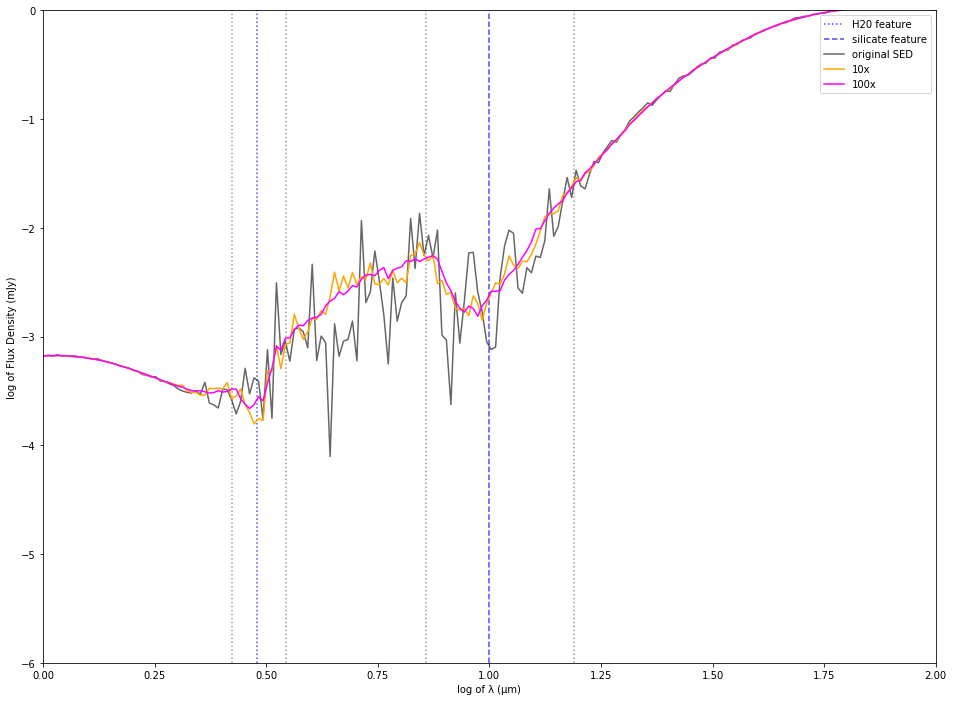

In [8]:
model=modeling.YSOModel()
model.read_yso("../grid/photonpack/71_10x.hdf5")
model71_10=np.log10(model.spectra["SED"].flux)
model=modeling.YSOModel()
model.read_yso("../grid/photonpack/71_100x.hdf5")
model71_100=np.log10(model.spectra["SED"].flux)

fig,ax=plt.subplots(1,figsize=(16,12))

# water feature -- there are features in water ice spectrum at 2.941 and 3.105 microns
plt.axvline(x=np.mean([np.log10(2.941),np.log10(3.105)]),c='b',linestyle=":",alpha=0.7,label="H20 feature")
plt.axvline(x=np.log10(2.65),c='black',linestyle=":",alpha=0.4)
plt.axvline(x=np.log10(3.5),c='black',linestyle=":",alpha=0.4)
# silicate feature at 10 microns
plt.axvline(x=np.log10(10.),c='b',linestyle="--",alpha=0.7,label="silicate feature")    
plt.axvline(x=np.log10(7.2),c='black',linestyle=":",alpha=0.4)
plt.axvline(x=np.log10(15.5),c='black',linestyle=":",alpha=0.4)     

ax.plot(np.log10(xvals), cube[71],c='black',label="original SED",alpha=0.6)

ax.plot(np.log10(xvals), model71_10,c='orange',label="10x",alpha=1)
ax.plot(np.log10(xvals), model71_100,c='magenta',label="100x",alpha=1)

#plt.xlim(-1.2,4.2)
plt.ylim(-6,0)
plt.xlim(0,2)    
plt.legend()
plt.ylabel("log of Flux Density (mJy)")
plt.xlabel("log of λ (μm)")
plt.show()

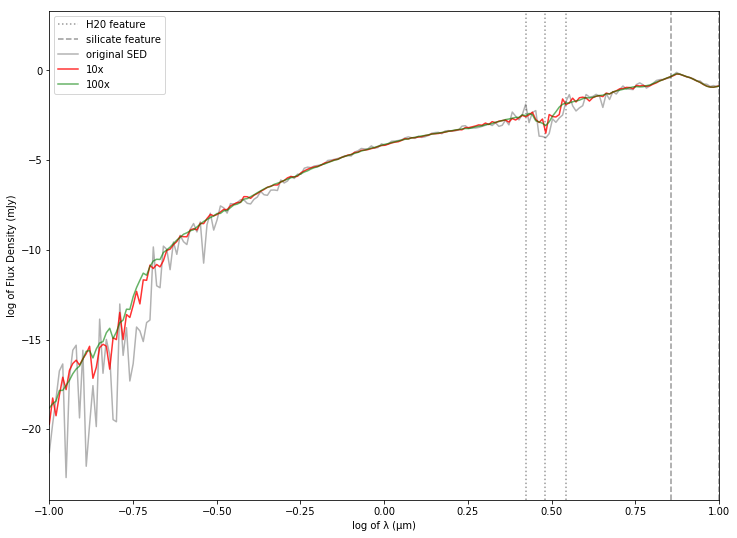

In [13]:
model=modeling.YSOModel()
model.read_yso("../grid/photonpack/46_10x.hdf5")
model46_10=np.log10(model.spectra["SED"].flux)
model=modeling.YSOModel()
model.read_yso("../grid/photonpack/46_100x.hdf5")
model46_100=np.log10(model.spectra["SED"].flux)

fig,ax=plt.subplots(1,figsize=(12,9))
# water feature -- there are features in water ice spectrum at 2.941 and 3.105 microns
plt.axvline(x=np.mean([np.log10(2.941),np.log10(3.105)]),c='black',linestyle=":",alpha=0.4,label="H20 feature")
plt.axvline(x=np.log10(2.65),c='black',linestyle=":",alpha=0.4)
plt.axvline(x=np.log10(3.5),c='black',linestyle=":",alpha=0.4)
# silicate feature at 10 microns
plt.axvline(x=np.log10(10.),c='black',linestyle="--",alpha=0.4,label="silicate feature")    
plt.axvline(x=np.log10(7.2),c='black',linestyle="--",alpha=0.4)
plt.axvline(x=np.log10(15.5),c='black',linestyle="--",alpha=0.4)  
ax.plot(np.log10(xvals), nancube[46],c='black',label="original SED",alpha=0.3)
ax.plot(np.log10(xvals), model46_10,c='red',label="10x",alpha=.8)
ax.plot(np.log10(xvals), model46_100,c='g',label="100x",alpha=.6)
plt.legend()
plt.xlim(-1,1)
plt.ylabel("log of Flux Density (mJy)")
plt.xlabel("log of λ (μm)")
plt.show()

/users/eteng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


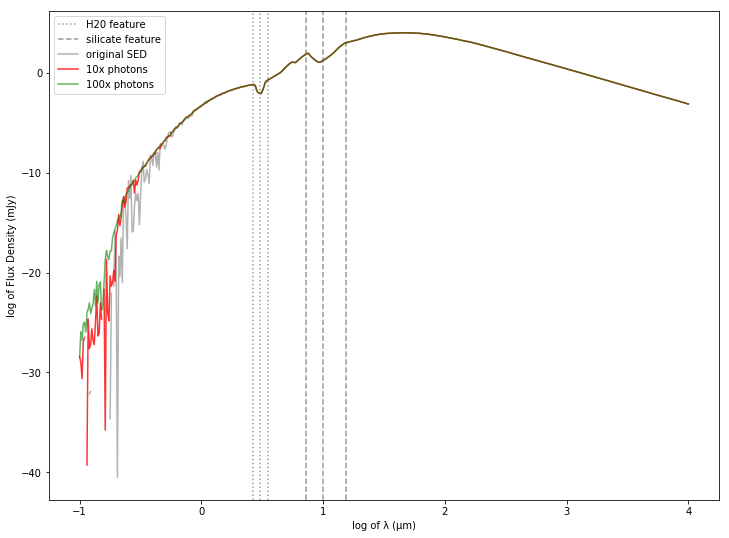

In [14]:
model=modeling.YSOModel()
model.read_yso("../grid/photonpack/68_10x.hdf5")
model68_10=np.log10(model.spectra["SED"].flux)
model=modeling.YSOModel()
model.read_yso("../grid/photonpack/68_100x.hdf5")
model68_100=np.log10(model.spectra["SED"].flux)

fig,ax=plt.subplots(1,figsize=(12,9))
# water feature -- there are features in water ice spectrum at 2.941 and 3.105 microns
plt.axvline(x=np.mean([np.log10(2.941),np.log10(3.105)]),c='black',linestyle=":",alpha=0.4,label="H20 feature")
plt.axvline(x=np.log10(2.65),c='black',linestyle=":",alpha=0.4)
plt.axvline(x=np.log10(3.5),c='black',linestyle=":",alpha=0.4)
# silicate feature at 10 microns
plt.axvline(x=np.log10(10.),c='black',linestyle="--",alpha=0.4,label="silicate feature")    
plt.axvline(x=np.log10(7.2),c='black',linestyle="--",alpha=0.4)
plt.axvline(x=np.log10(15.5),c='black',linestyle="--",alpha=0.4)  
ax.plot(np.log10(xvals), nancube[68],c='black',label="original SED",alpha=0.3)
ax.plot(np.log10(xvals), model68_10,c='red',label="10x photons",alpha=.8)
ax.plot(np.log10(xvals), model68_100,c='g',label="100x photons",alpha=.6)

plt.legend()
#plt.xlim(-1,0.5)
plt.ylabel("log of Flux Density (mJy)")
plt.xlabel("log of λ (μm)")
plt.show()

In [169]:
def comp_10(i):
    print(i)
    model=modeling.YSOModel()
    model.read_yso("../grid/photonpack/"+str(i)+"_10x.hdf5")
    model_10=np.log10(model.spectra["SED"].flux)

    fig,ax=plt.subplots(1,figsize=(16,12))

    # water feature -- there are features in water ice spectrum at 2.941 and 3.105 microns
    plt.axvline(x=np.mean([np.log10(2.941),np.log10(3.105)]),c='b',linestyle=":",alpha=0.7,label="H20 feature")
    plt.axvline(x=np.log10(2.65),c='black',linestyle=":",alpha=0.4)
    plt.axvline(x=np.log10(3.5),c='black',linestyle=":",alpha=0.4)
    # silicate feature at 10 microns
    plt.axvline(x=np.log10(10.),c='b',linestyle="--",alpha=0.7,label="silicate feature")    
    plt.axvline(x=np.log10(7.2),c='black',linestyle=":",alpha=0.4)
    plt.axvline(x=np.log10(15.5),c='black',linestyle=":",alpha=0.4)     

    ax.plot(np.log10(xvals), cube[i],c='black',label="original SED, model "+str(i),alpha=0.6)

    ax.plot(np.log10(xvals), model_10,c='orange',label="10x",alpha=.8)

    #plt.xlim(-1.2,4.2)
    #plt.ylim(-6,0)
    #plt.xlim(0,2)    
    plt.legend()
    plt.ylabel("log of Flux Density (mJy)")
    plt.xlabel("log of λ (μm)")
    plt.show()

In [10]:
dictionary=np.load("../grid_metadata/dictionary.npy")
dictionary[0]

for i in (317,372,687,823,896,1038,1126):
    print(dictionary[i]['filename'])

Tstar_3781.544_logLstar_0.845_logMdisk_-3.306_logRdisk_1.717_h0_0.352_logRin_0.771_gamma_0.071_beta_1.639_logMenv_-2.605_logRenv_3.587_fcav_0.534_ksi_1.294_logamax_0.450_p_3.185_incl_56.269.hdf5
Tstar_4052.138_logLstar_0.308_logMdisk_-2.725_logRdisk_0.856_h0_0.337_logRin_-0.060_gamma_0.949_beta_1.483_logMenv_-3.150_logRenv_3.812_fcav_0.455_ksi_1.179_logamax_4.927_p_3.671_incl_64.987.hdf5
Tstar_4987.477_logLstar_0.197_logMdisk_-2.425_logRdisk_2.246_h0_0.483_logRin_-0.679_gamma_1.263_beta_0.607_logMenv_-7.271_logRenv_3.429_fcav_0.784_ksi_1.381_logamax_1.339_p_3.619_incl_86.140.hdf5
Tstar_3481.742_logLstar_-0.747_logMdisk_-3.468_logRdisk_2.365_h0_0.189_logRin_0.109_gamma_1.205_beta_1.765_logMenv_-4.605_logRenv_2.929_fcav_0.724_ksi_1.080_logamax_1.064_p_3.001_incl_12.153.hdf5
Tstar_3793.900_logLstar_0.645_logMdisk_-2.001_logRdisk_2.902_h0_0.268_logRin_0.090_gamma_0.372_beta_1.797_logMenv_-5.085_logRenv_3.515_fcav_0.504_ksi_1.451_logamax_1.449_p_4.274_incl_69.293.hdf5
Tstar_3358.205_logLsta

0


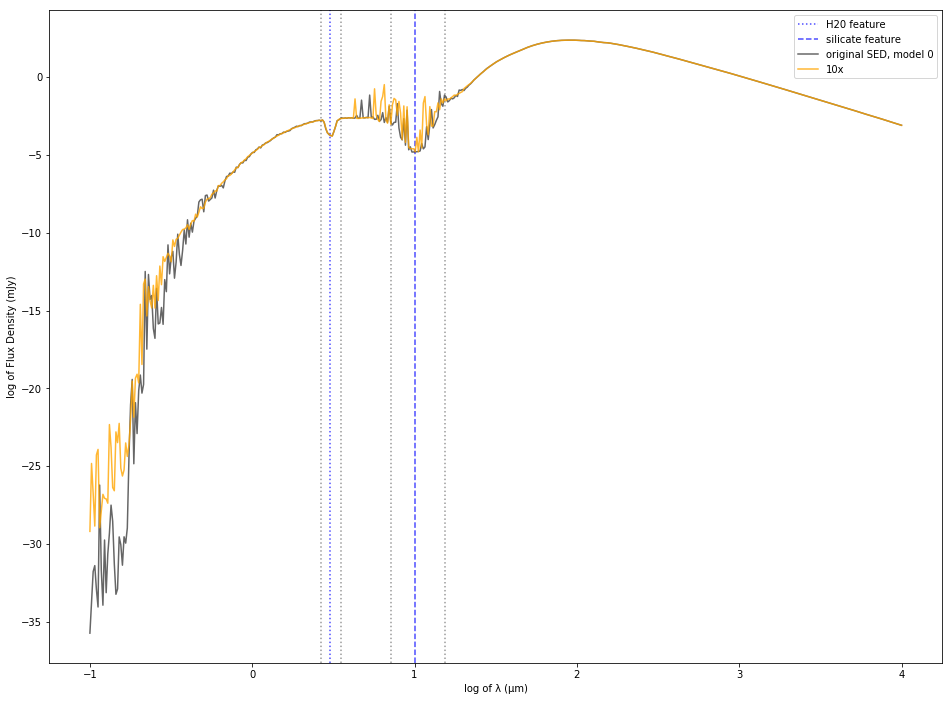

131


/users/eteng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


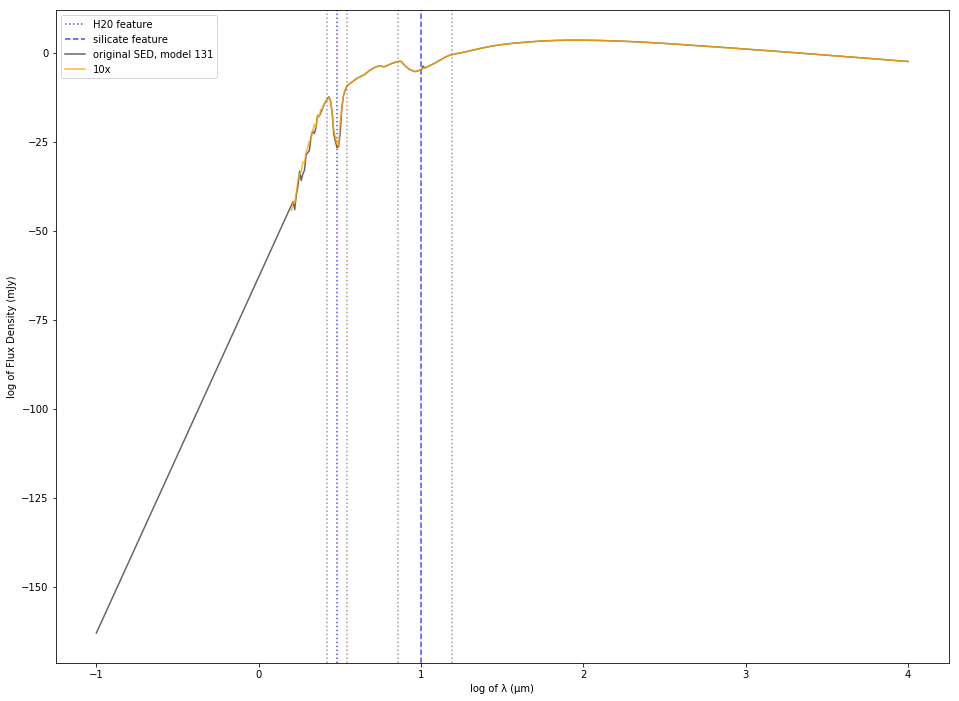

210


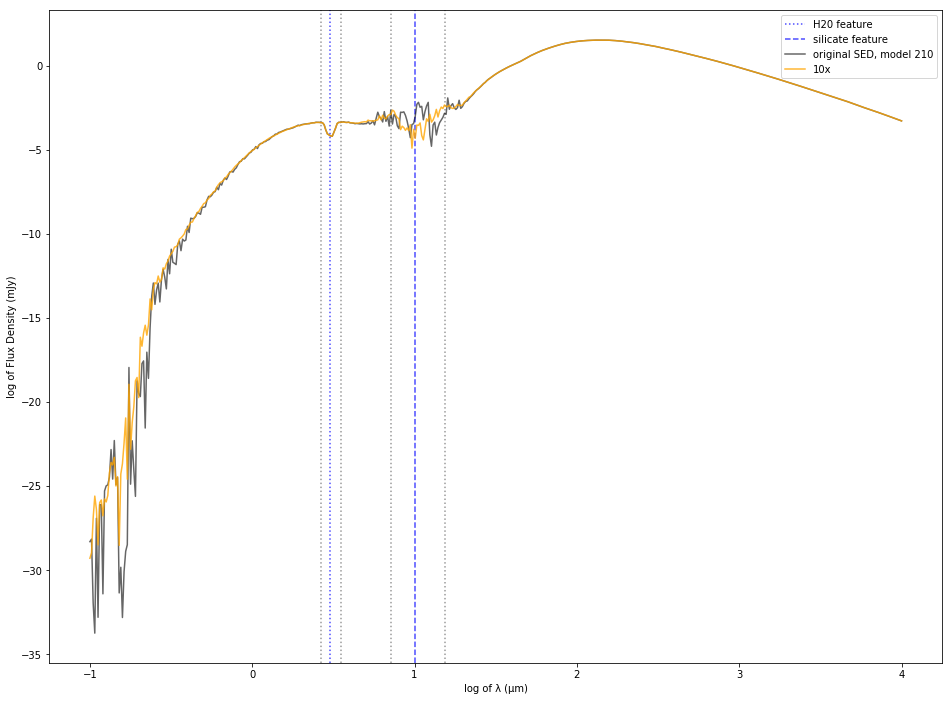

317


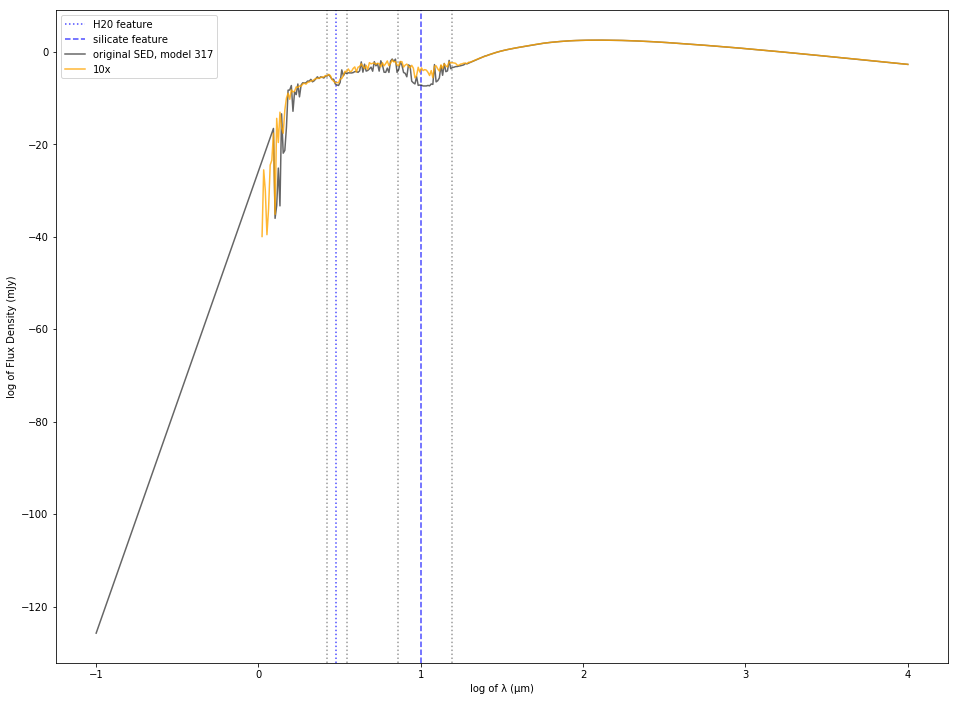

377


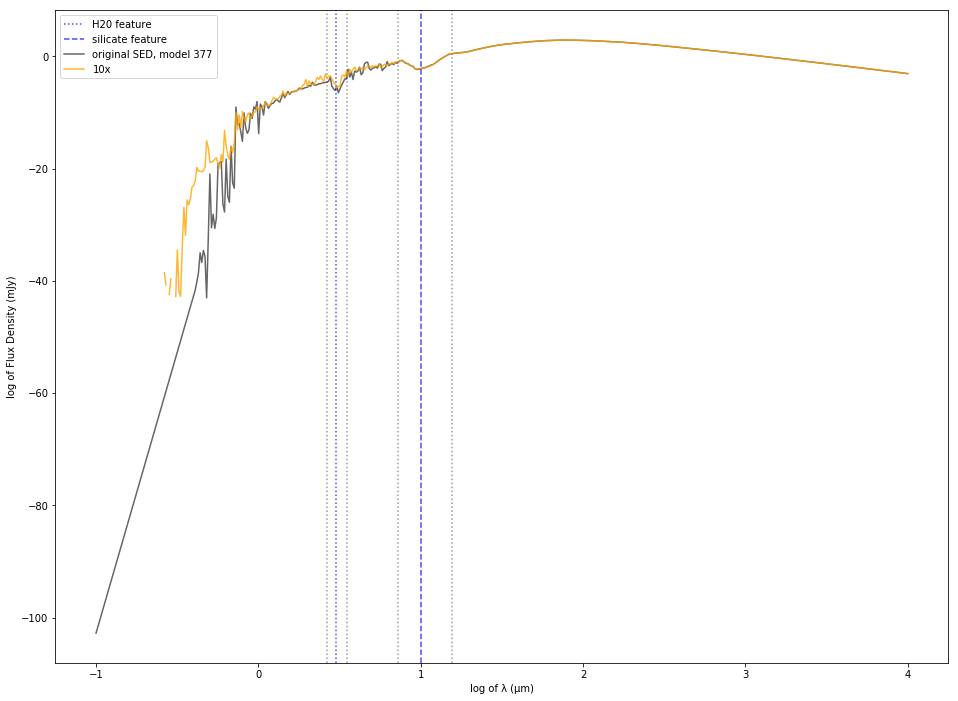

486


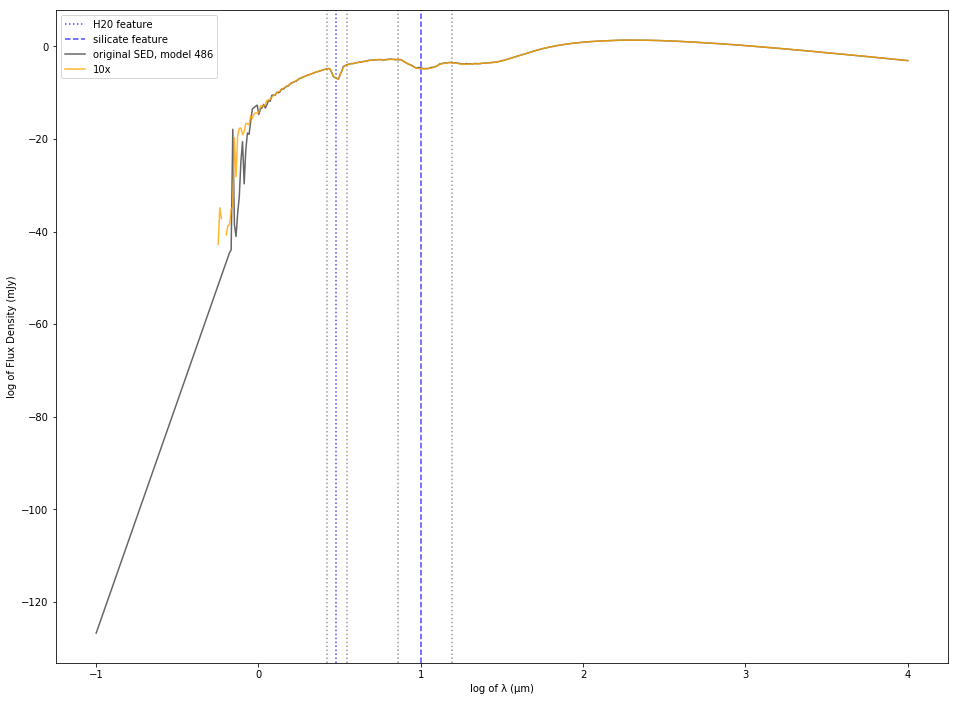

489


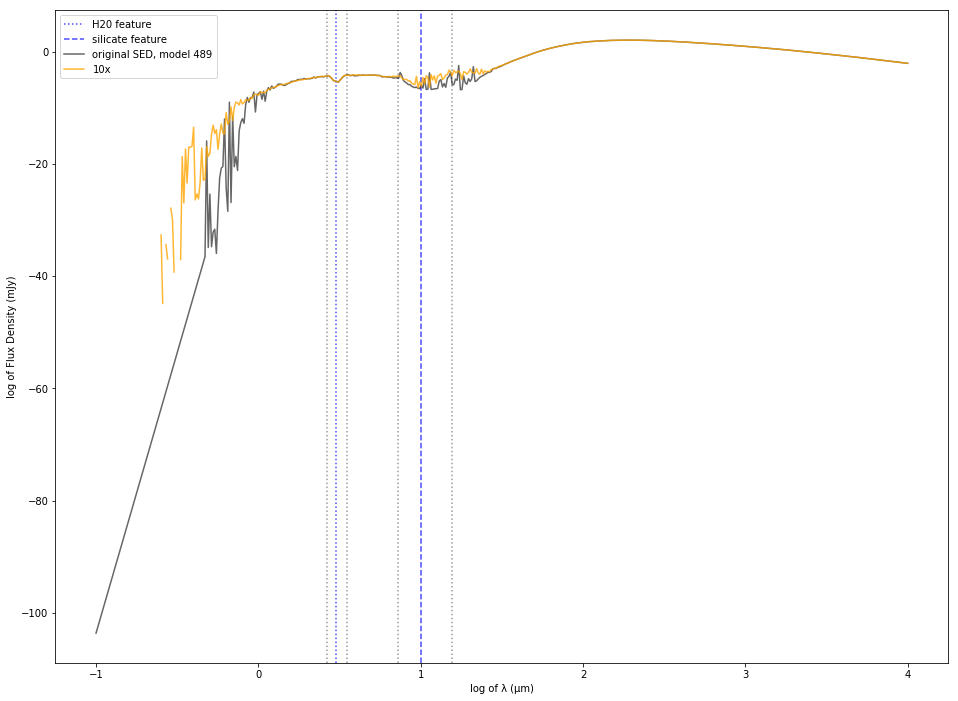

62


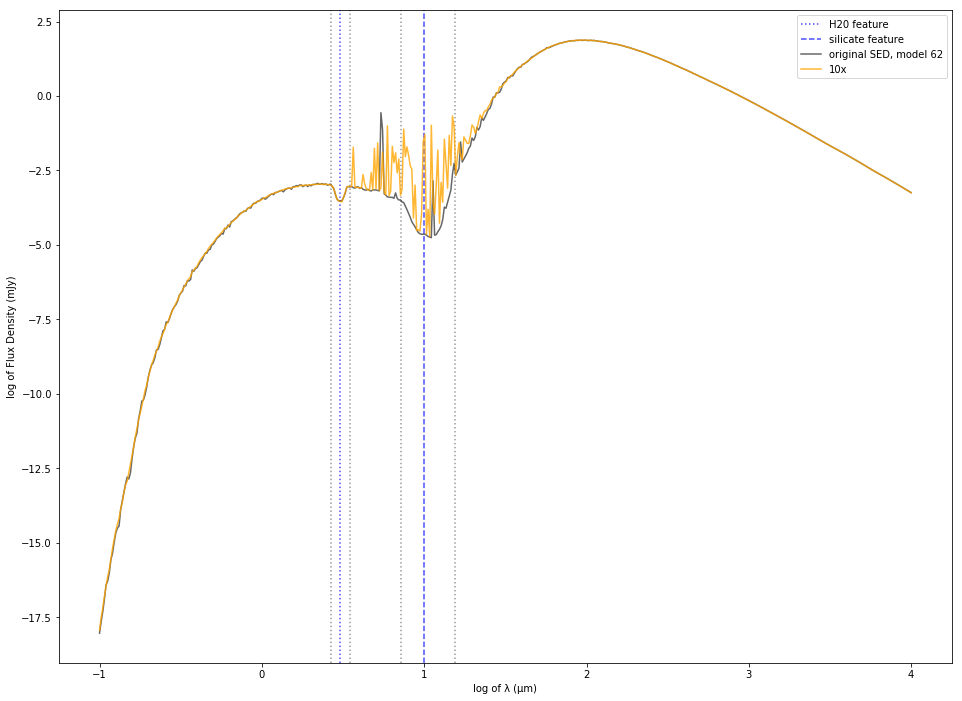

8


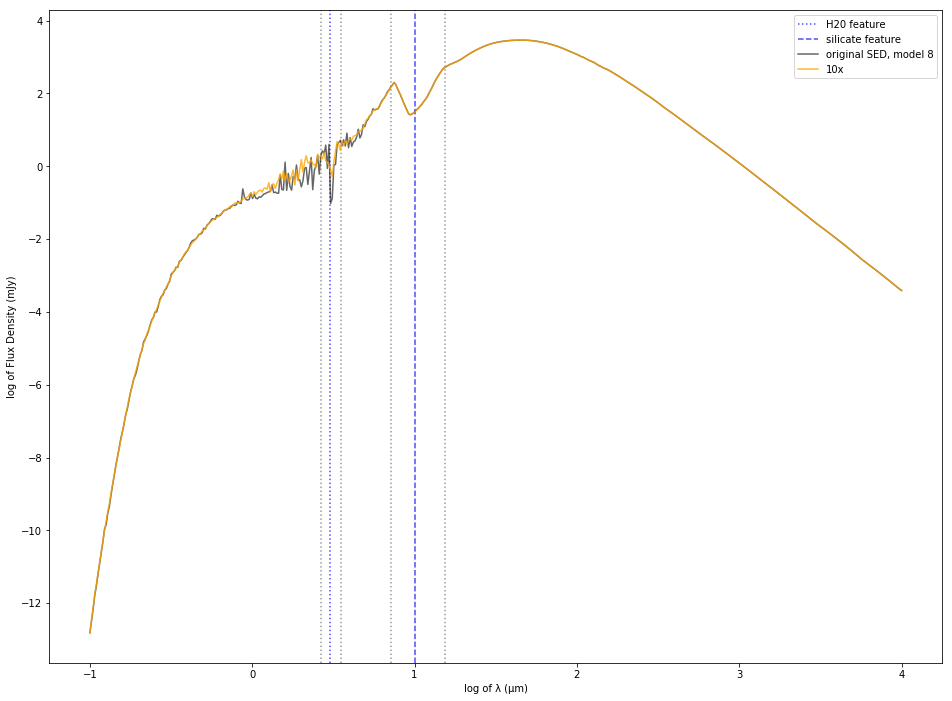

In [170]:
for i in (0,131,210,317,377,486,489,62,8):
    comp_10(i)

In [175]:
def comp_10_therm(i):
    print(i)
    model=modeling.YSOModel()
    model.read_yso("../grid/photonpack/"+str(i)+"_10x_therm.hdf5")
    model_10=np.log10(model.spectra["SED"].flux)

    fig,ax=plt.subplots(1,figsize=(16,12))

    # water feature -- there are features in water ice spectrum at 2.941 and 3.105 microns
    plt.axvline(x=np.mean([np.log10(2.941),np.log10(3.105)]),c='b',linestyle=":",alpha=0.7,label="H20 feature")
    plt.axvline(x=np.log10(2.65),c='black',linestyle=":",alpha=0.4)
    plt.axvline(x=np.log10(3.5),c='black',linestyle=":",alpha=0.4)
    # silicate feature at 10 microns
    plt.axvline(x=np.log10(10.),c='b',linestyle="--",alpha=0.7,label="silicate feature")    
    plt.axvline(x=np.log10(7.2),c='black',linestyle=":",alpha=0.4)
    plt.axvline(x=np.log10(15.5),c='black',linestyle=":",alpha=0.4)     

    ax.plot(np.log10(xvals), cube[i],c='black',label="original SED, model "+str(i),alpha=0.6)

    ax.plot(np.log10(xvals), model_10,c='orange',label="10x, SED and thermal",alpha=.8)

    #plt.xlim(-1.2,4.2)
    #plt.ylim(-6,0)
    #plt.xlim(0,2)    
    plt.legend()
    plt.ylabel("log of Flux Density (mJy)")
    plt.xlabel("log of λ (μm)")
    plt.show()

0


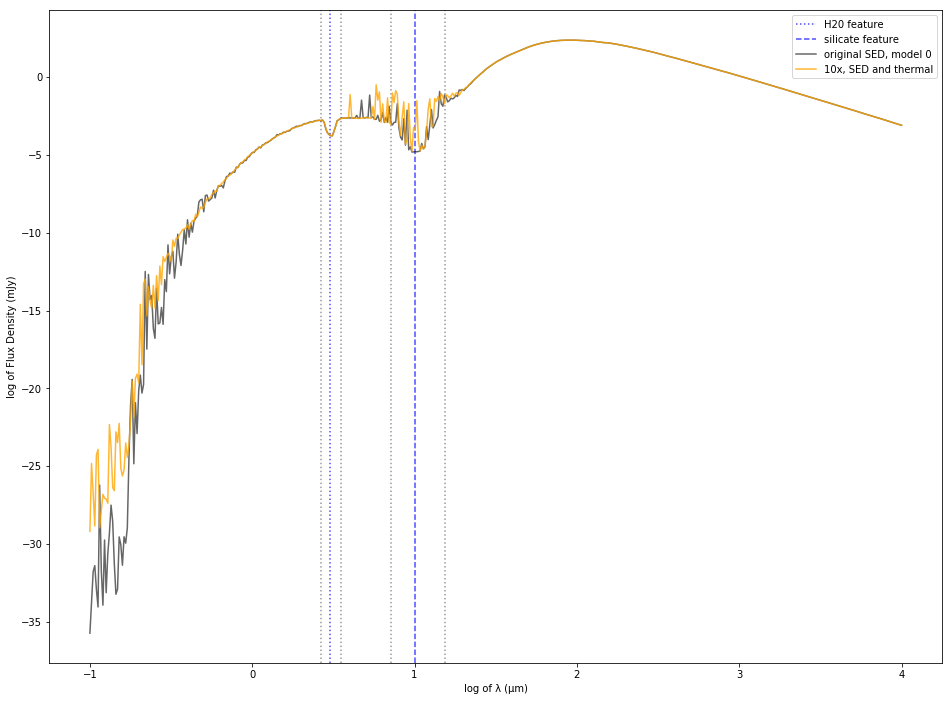

In [176]:
comp_10_therm(0)

62


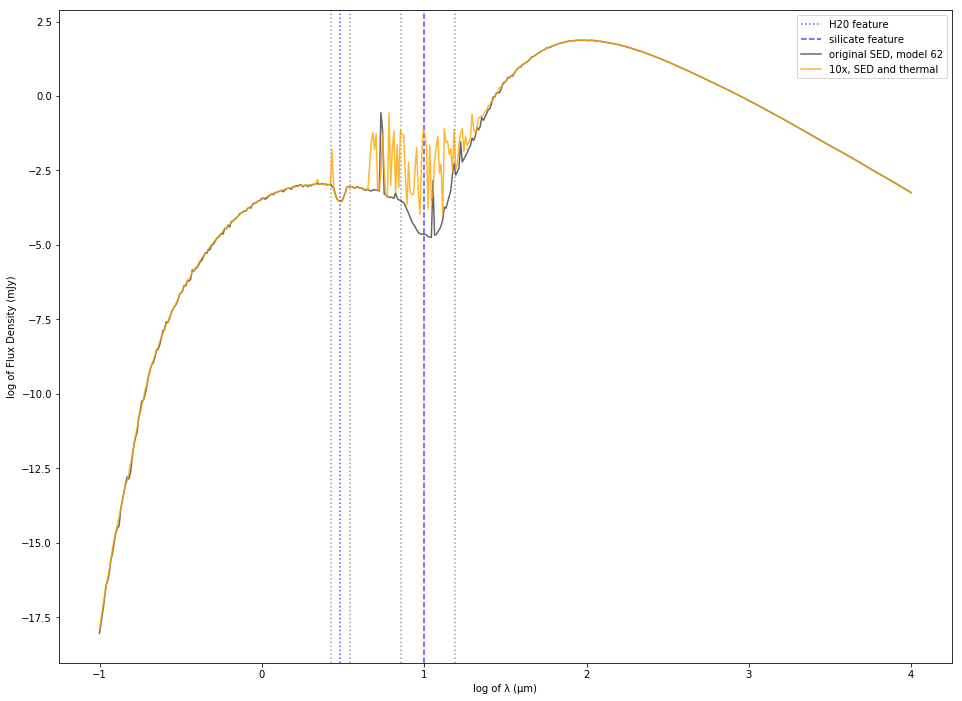

In [177]:
comp_10_therm(62)

In [16]:
def gausskern(size): # size = 2* standard deviation
    arr=Gaussian1DKernel(size/2).array
    return arr
def tophatkern(size): # size = width of tophat
    arr=[]
    height=1.0/size
    for i in range(size):
        arr.append(height)
    return arr

featlim=np.log10([2.65,3.5,7.2,15.5])
featlimindex=[]
for i in range(len(featlim)):
    val=min(np.log10(xvals), key=lambda x:abs(x-featlim[i]))
    featlimindex.append(np.where(np.log10(xvals)==val)[0][0])

In [22]:
def smooth_orig_SED(ds,index,kernel,kernsize):
    fig,ax=plt.subplots(1,figsize=(9,6))
    
    # water feature -- there are features in water ice spectrum at 2.941 and 3.105 microns
    plt.axvline(x=np.mean([np.log10(2.941),np.log10(3.105)]),c='b',linestyle=":",alpha=0.7,label="H20 feature")
    plt.axvline(x=np.log10(2.65),c='black',linestyle=":",alpha=0.4)
    plt.axvline(x=np.log10(3.5),c='black',linestyle=":",alpha=0.4)
    # silicate feature at 10 microns
    plt.axvline(x=np.log10(10.),c='b',linestyle="--",alpha=0.7,label="silicate feature")    
    plt.axvline(x=np.log10(7.2),c='black',linestyle=":",alpha=0.4)
    plt.axvline(x=np.log10(15.5),c='black',linestyle=":",alpha=0.4)  
    
    ax.plot(np.log10(xvals), cube[ds[index]],c='red',label="original SED",alpha=0.8)
    
    if kernel=="t":
        smooth=np.convolve(cube[ds[index]],tophatkern(kernsize), mode="same")
        for i in range(int(kernsize/2)):
            smooth[i]=smooth[int(round(kernsize/2))]
            smooth[len(smooth)-1-i]=smooth[len(smooth)-int(round(kernsize/2))-1]
    if kernel=="g":
        smooth=np.convolve(cube[ds[index]],gausskern(kernsize),mode="same")
        for i in range(int(kernsize)):
            smooth[i]=smooth[int(round(kernsize))]
            smooth[len(smooth)-1-i]=smooth[len(smooth)-int(round(kernsize))-1]
            
    ax.plot(np.log10(xvals), smooth,c='g',label="smoothed SED",alpha=0.8)
    
    plt.xlim(-1.2,4.2)
    plt.legend()
    plt.ylabel("log of Flux Density (mJy)")
    plt.xlabel("log of λ (μm)")
    plt.show()

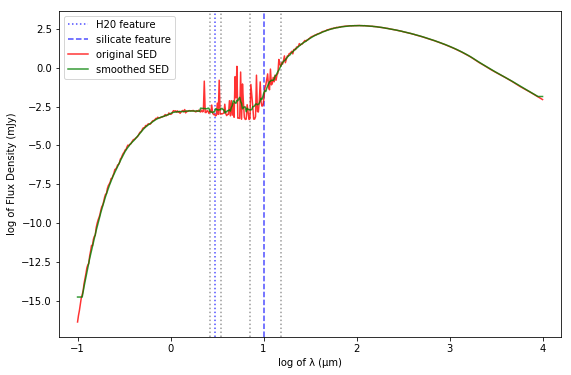

In [23]:
smooth_orig_SED(noise,2,"t",10)              

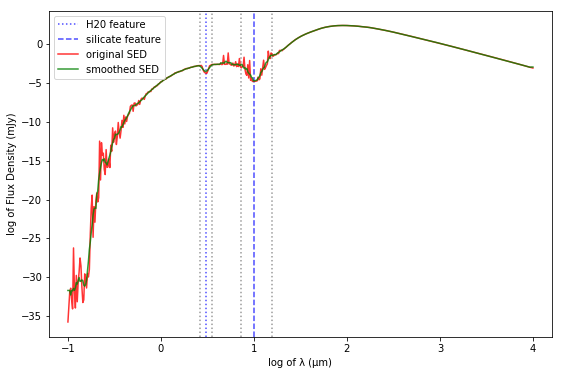

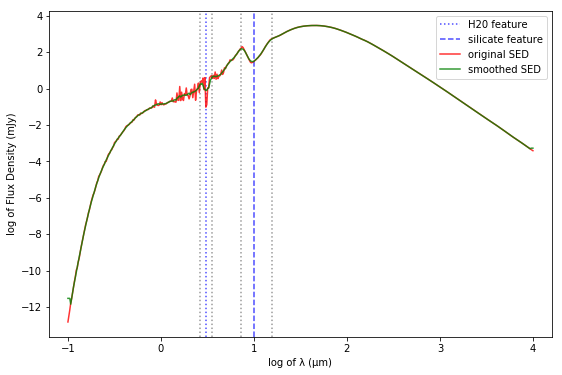

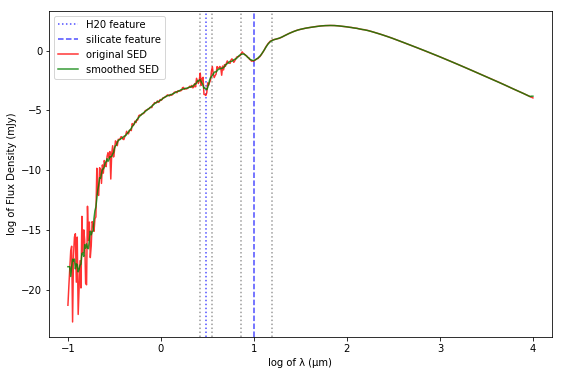

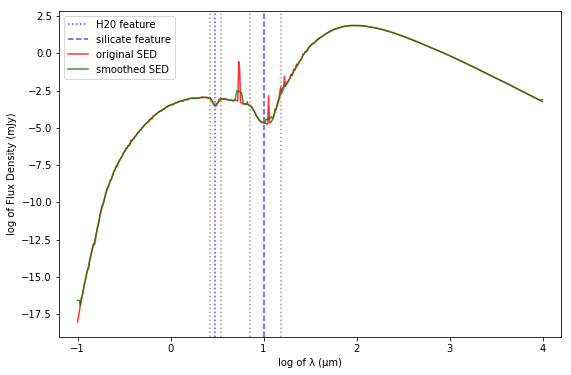

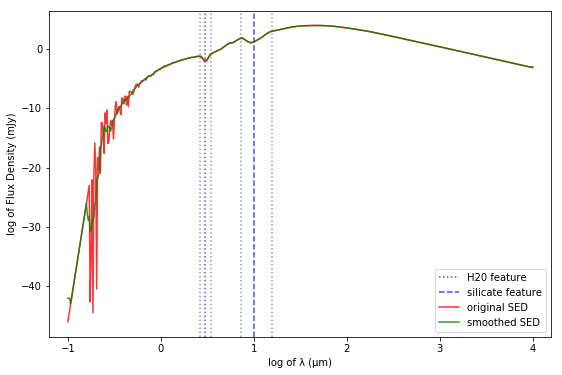

In [24]:
ds=both
for i in range(len(ds)):
    smooth_orig_SED(ds,i,"t",7)

In [25]:
def feat_SED(fluxvals,w1=2.65,w2=3.5,s1=7.2,s2=15.5):
    fig,ax=plt.subplots(1,figsize=(12,9))
    # water feature -- there are features in water ice spectrum at 2.941 and 3.105 microns
    plt.axvline(x=np.mean([np.log10(2.941),np.log10(3.105)]),c='r',linestyle=":",alpha=0.7,label="H20 feature")
    plt.axvline(x=np.log10(w1),c='b',linestyle=":",alpha=0.7)
    plt.axvline(x=np.log10(w2),c='b',linestyle=":",alpha=0.7)
    # silicate feature at 10 microns
    plt.axvline(x=np.log10(10.),c='r',linestyle=":",alpha=0.7,label="silicate feature")    
    plt.axvline(x=np.log10(s1),c='b',linestyle=":",alpha=0.7)
    plt.axvline(x=np.log10(s2),c='b',linestyle=":",alpha=0.7)
    ax.plot(np.log10(xvals), fluxvals,c='black',label="original SED",alpha=0.7)
    #plt.xlim(0,1.5)e
    plt.legend()
    plt.ylabel("log of Flux Density (mJy)")
    plt.xlabel("log of λ (μm)")
    plt.show()

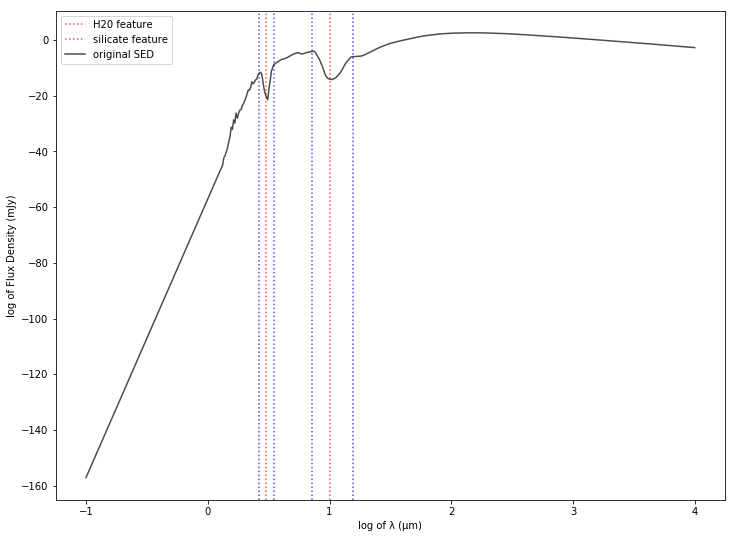

5


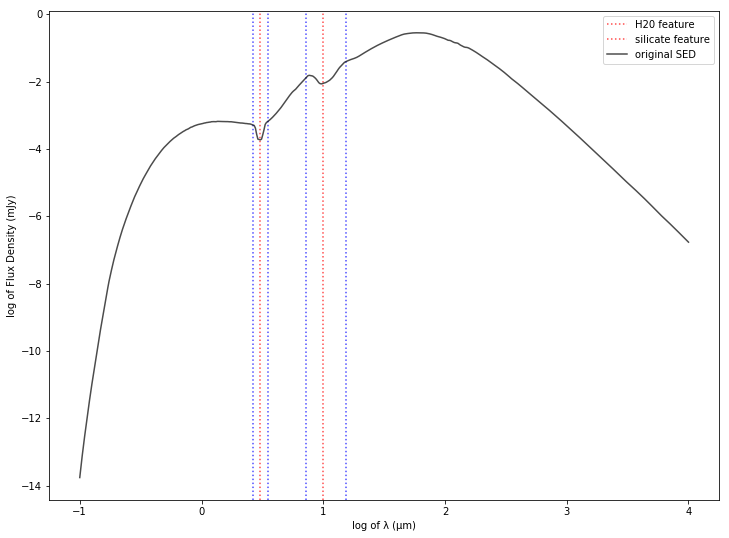

16


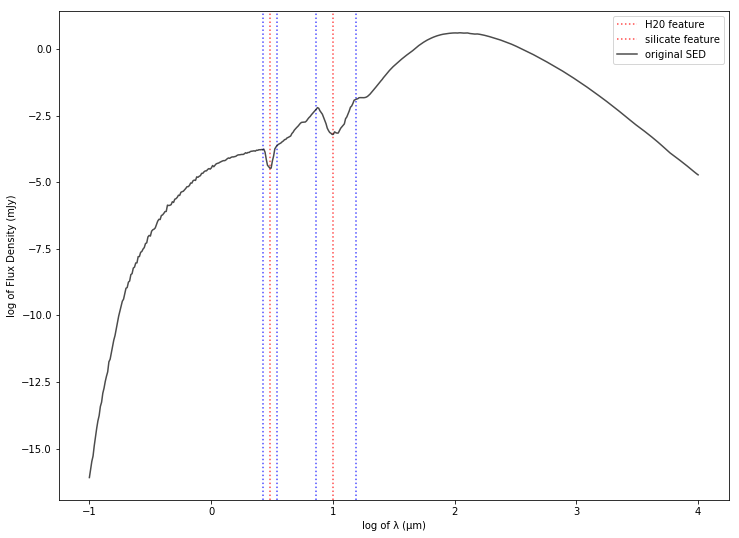

35


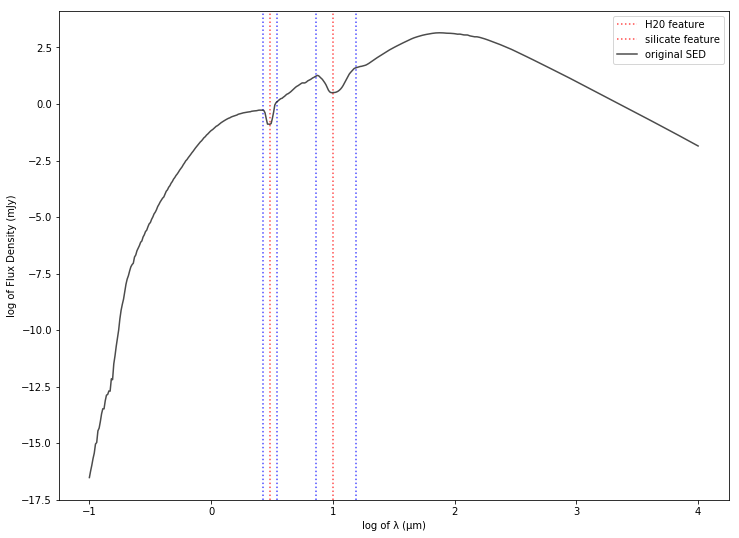

36


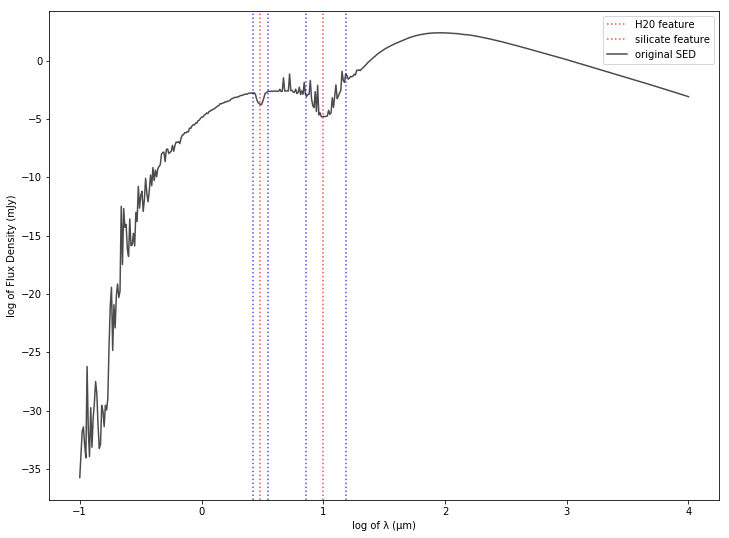

0


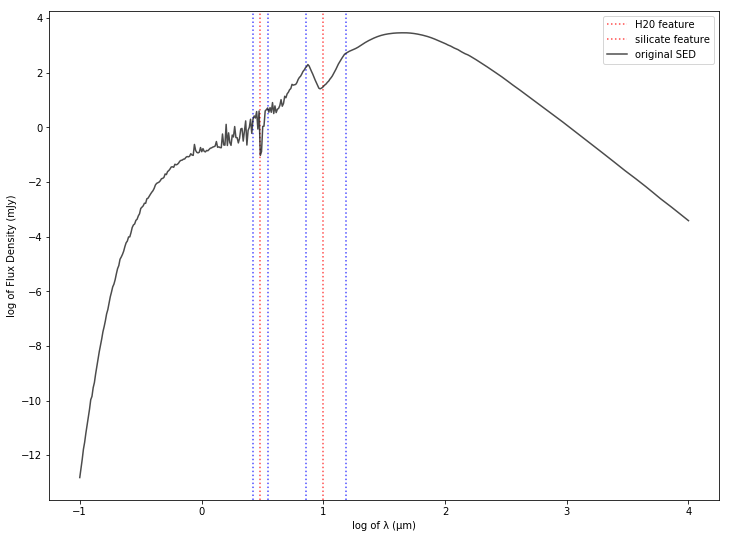

8


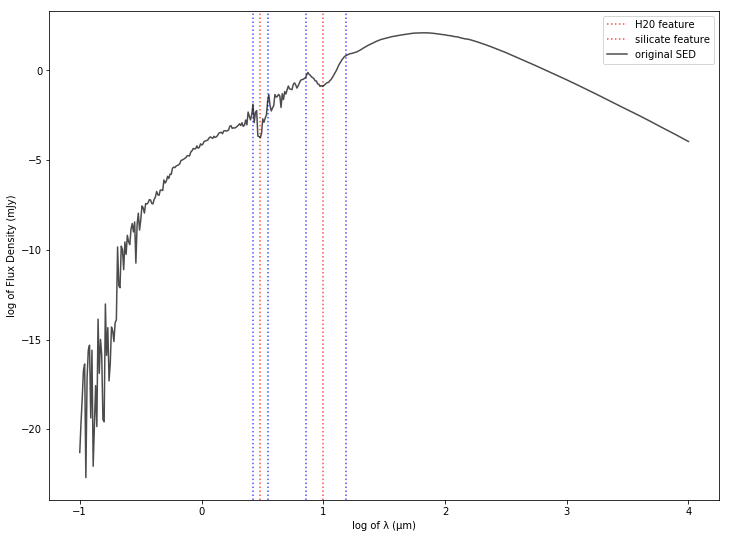

46


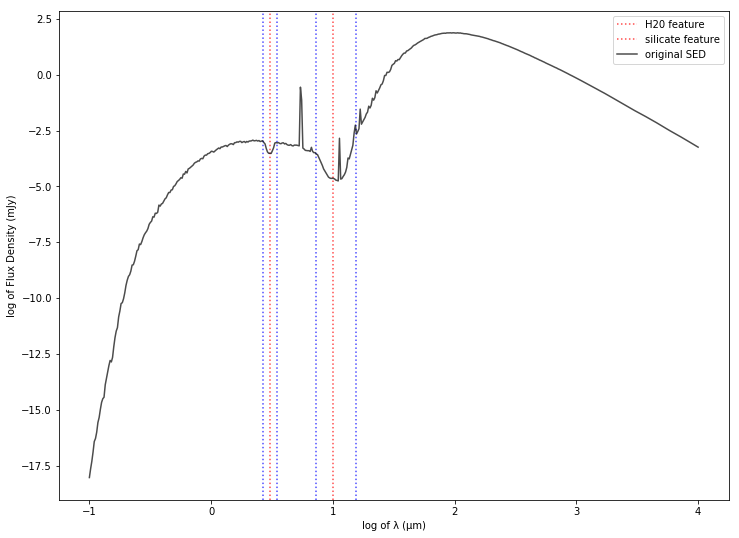

62


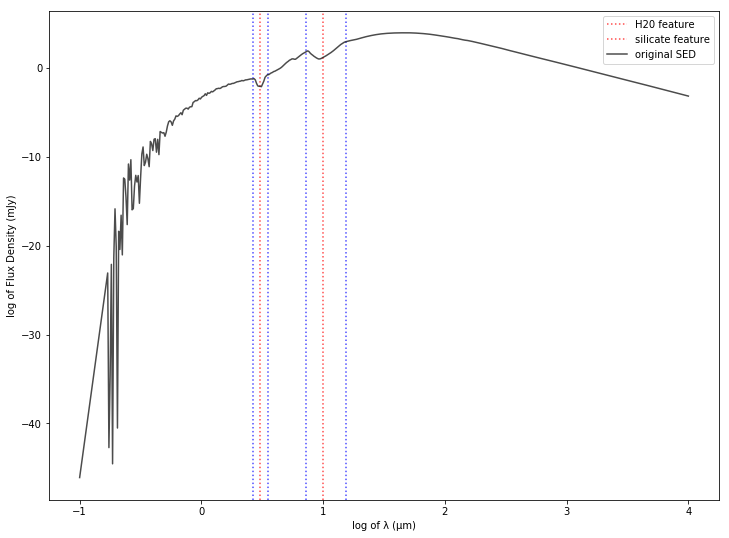

68


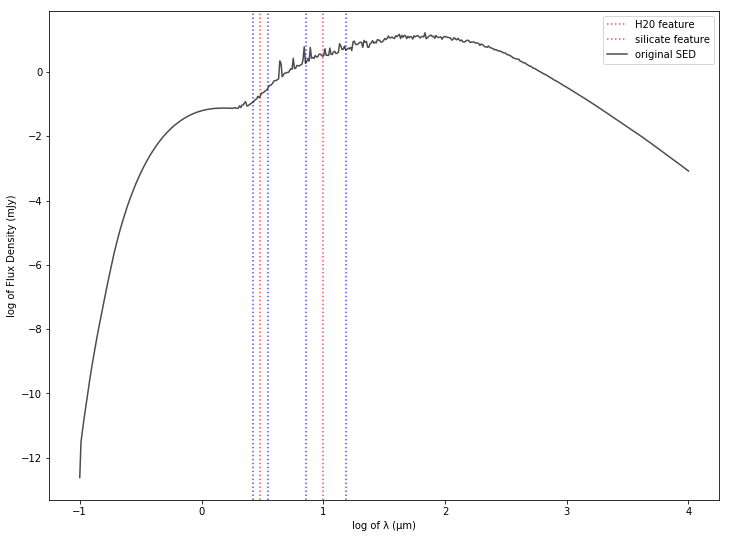

12


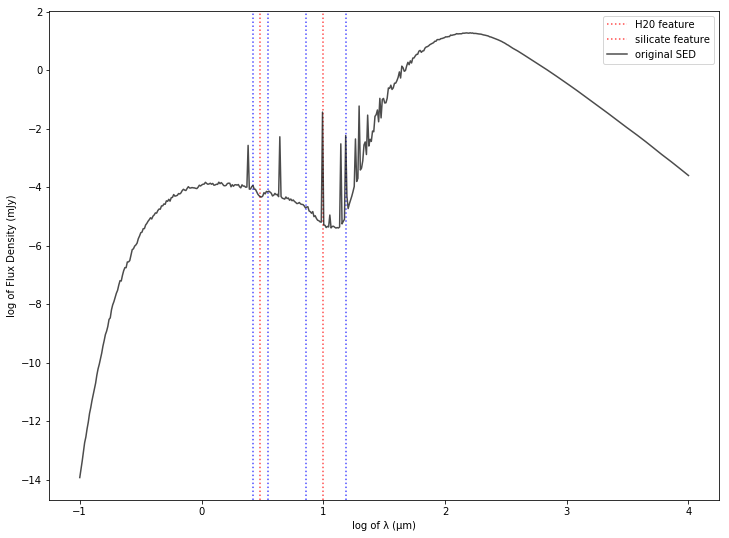

25


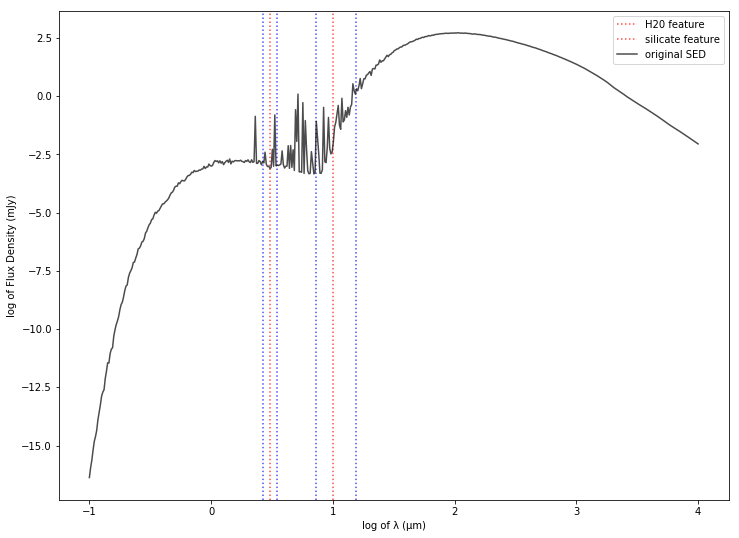

45


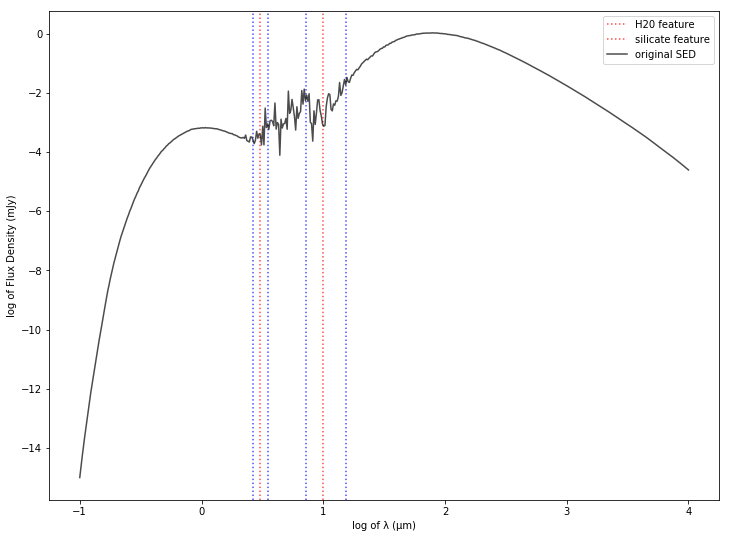

71


In [26]:
for i in range(len(feat)):
    feat_SED(cube[feat[i]],2.65,3.5,7.2,15.5)
    print(feat[i])
for i in range(len(both)):
    feat_SED(cube[both[i]],2.65,3.5,7.2,15.5)    
    print(both[i])
for i in range(len(noise)):
    feat_SED(cube[noise[i]],2.65,3.5,7.2,15.5) 
    print(noise[i])

In [28]:
def extend_smooth_cut(data,kernsize,kernstyle,a1=5,a2=5):
    if kernstyle=='g':
        extras=[round(kernsize*2),round(kernsize*2)]
        kernel=gausskern(kernsize)
    if kernstyle=='t':
        extras=[(kernsize//2),((kernsize-1)//2)]
        kernel=tophatkern(kernsize)
        
    leftm=(data[a1]-data[0])/a1
    rightm=(data[-1]-data[-1-a2])/a2
    
    extended_data=[]
    for i in range(extras[0]):
        extended_data.append(leftm*(i-extras[0])+data[0])
    extended_data+=np.ndarray.tolist(np.array(data))
    for i in range(extras[1]):
        extended_data.append(rightm*(i+1)+data[-1])
    smoothed=np.convolve(extended_data,kernel,mode="valid")
    return smoothed

In [29]:
def piece(data,ckern,ckernsize,wkern,wkernsize,skern,skernsize,aout,ain):
    fig,ax=plt.subplots(1,figsize=(16,12))
    
    smooth=[]    
    smooth+=np.ndarray.tolist(np.array(extend_smooth_cut(data[:featlimindex[0]],ckernsize,ckern,a1=aout,a2=aout)))
    smooth+=np.ndarray.tolist(np.array(extend_smooth_cut(data[featlimindex[0]:featlimindex[1]+1],wkernsize,wkern,a1=ain,a2=ain)))
    smooth+=np.ndarray.tolist(np.array(extend_smooth_cut(data[featlimindex[1]+1:featlimindex[2]],ckernsize,ckern,a1=aout,a2=aout)))
    smooth+=np.ndarray.tolist(np.array(extend_smooth_cut(data[featlimindex[2]:featlimindex[3]+1],skernsize,skern,a1=ain,a2=ain)))
    smooth+=np.ndarray.tolist(np.array(extend_smooth_cut(data[featlimindex[3]+1:],ckernsize,ckern,a1=aout,a2=aout)))
    
    # water feature -- there are features in water ice spectrum at 2.941 and 3.105 microns
    plt.axvline(x=np.mean([np.log10(2.941),np.log10(3.105)]),c='r',linestyle=":",alpha=0.7,label="H20 feature")
    plt.axvline(x=np.log10(2.65),c='b',linestyle=":",alpha=0.7)
    plt.axvline(x=np.log10(3.5),c='b',linestyle=":",alpha=0.7)
    # silicate feature at 10 microns
    plt.axvline(x=np.log10(10.),c='r',linestyle="--",alpha=0.7,label="silicate feature")    
    plt.axvline(x=np.log10(7.2),c='b',linestyle="--",alpha=0.7)
    plt.axvline(x=np.log10(15.5),c='b',linestyle="--",alpha=0.7)
    
    ax.plot(np.log10(xvals), data,c='black',label="original SED",alpha=0.6)    
    ax.plot(np.log10(xvals), smooth,c='red',label="smoothed SED",alpha=0.8)
    
    #plt.xlim(0.2,1.4) # keep it to the features
    plt.legend()
    plt.ylabel("log of Flux Density (mJy)")
    plt.xlabel("log of λ (μm)")
    plt.show()

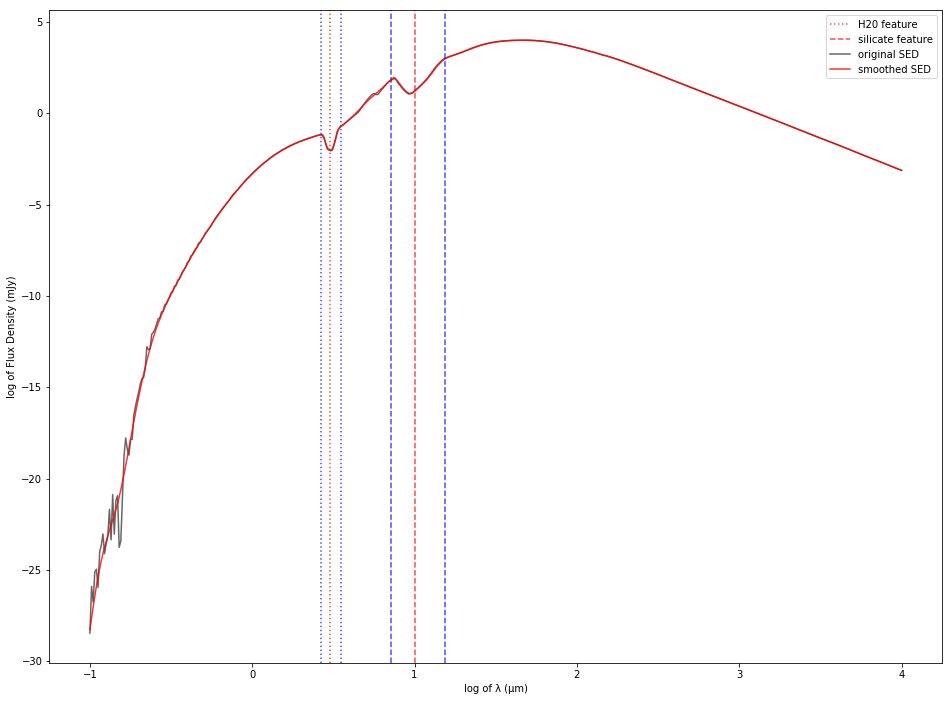

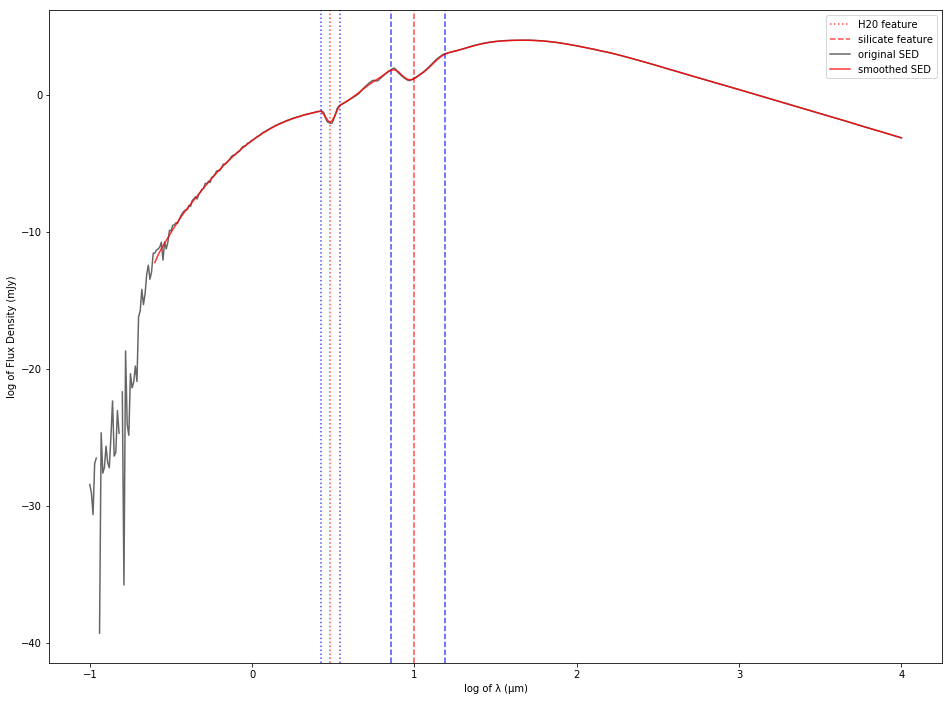

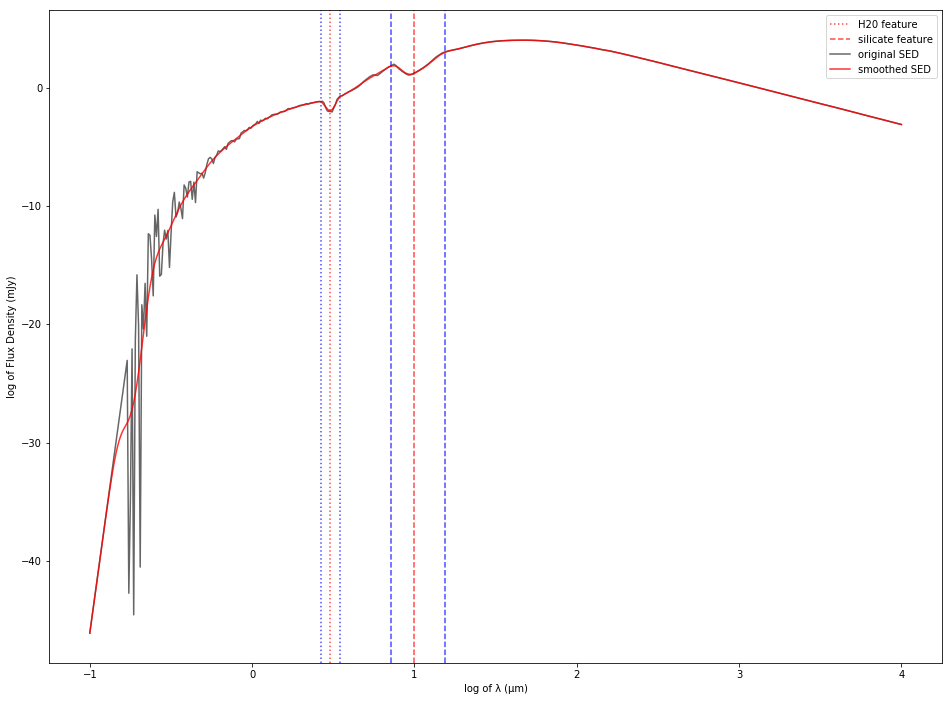

In [34]:
piece(model68_100,"g",10,"t",3,"t",4,aout=7,ain=2)
piece(model68_10,"g",10,"t",5,"t",6,aout=7,ain=2)
piece(cube[68],"g",10,"t",5,"t",6,aout=7,ain=2)


5


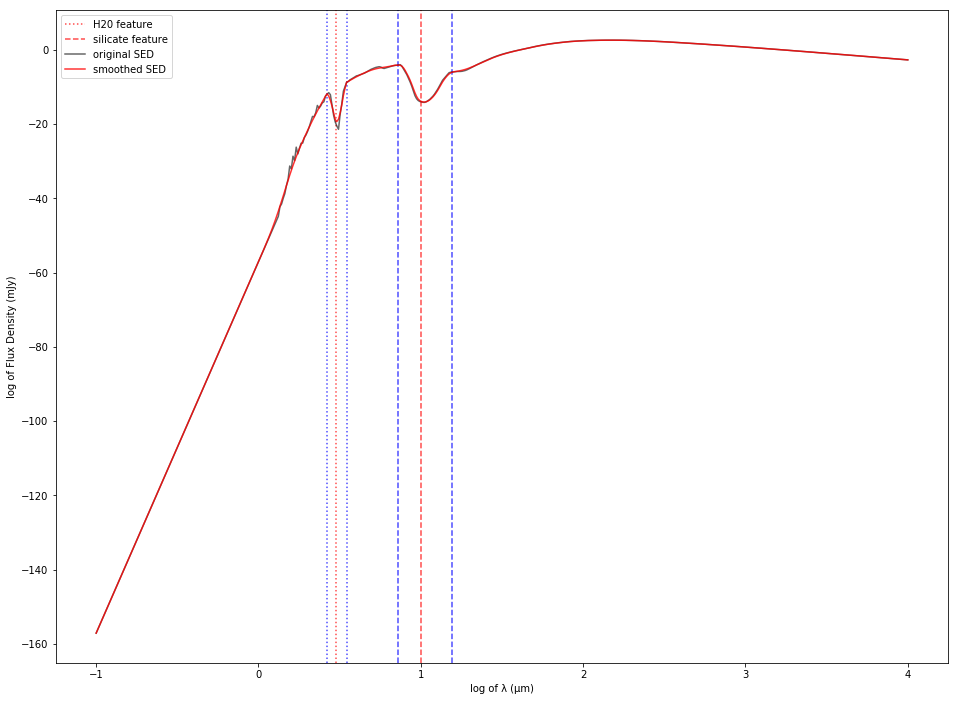

16


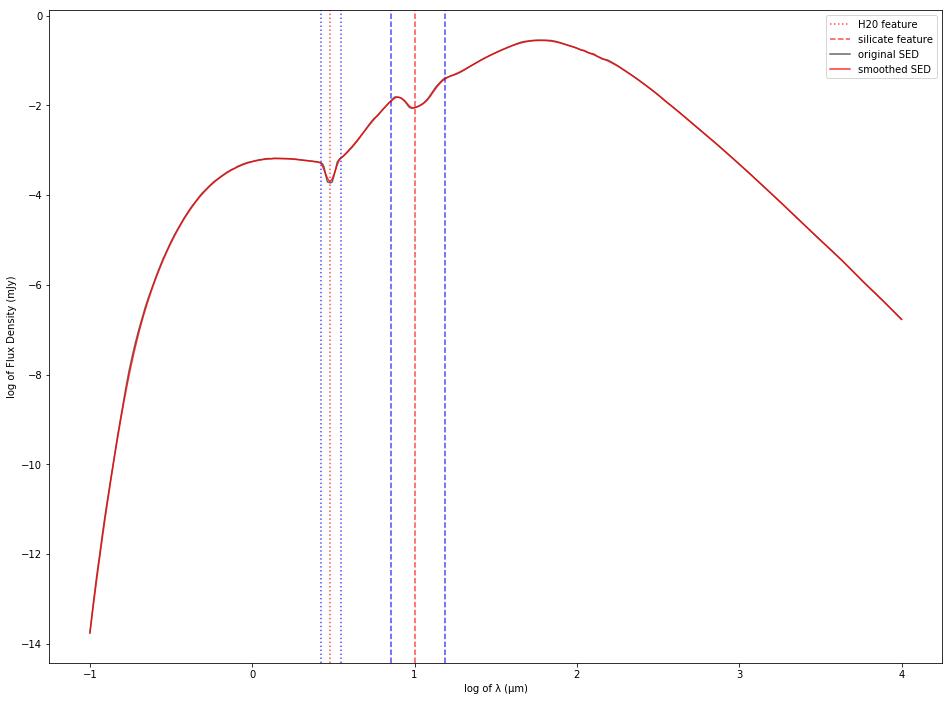

35


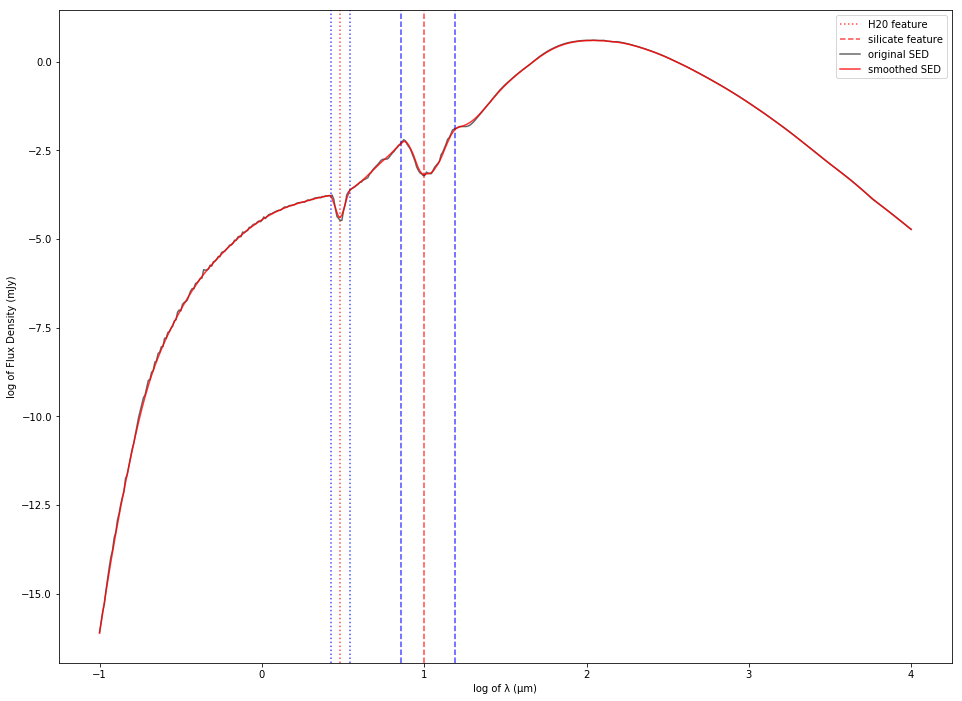

36


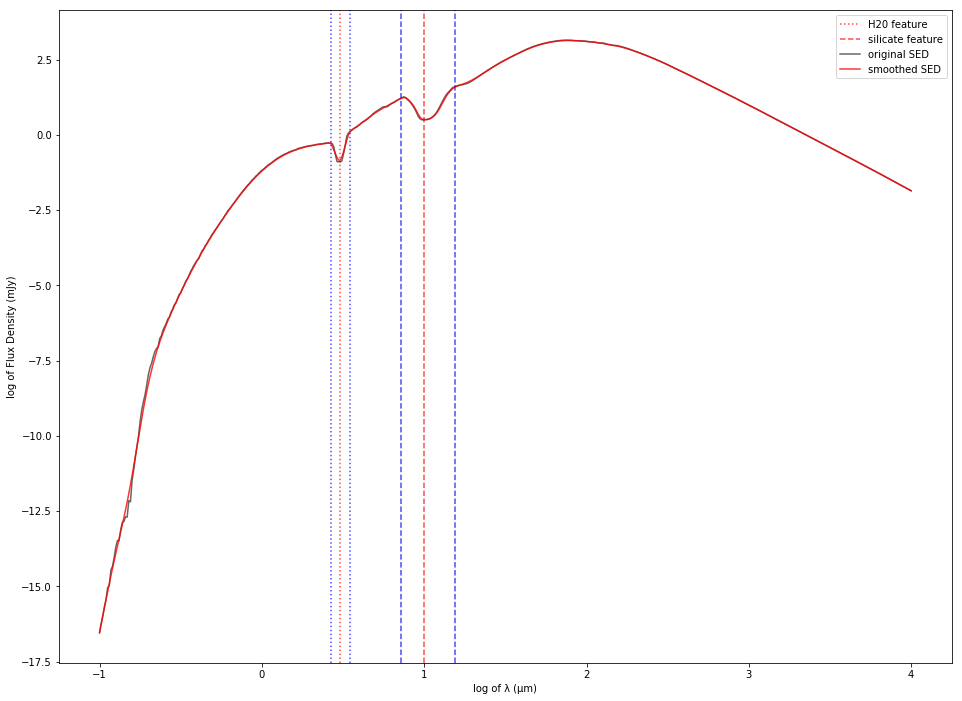

0


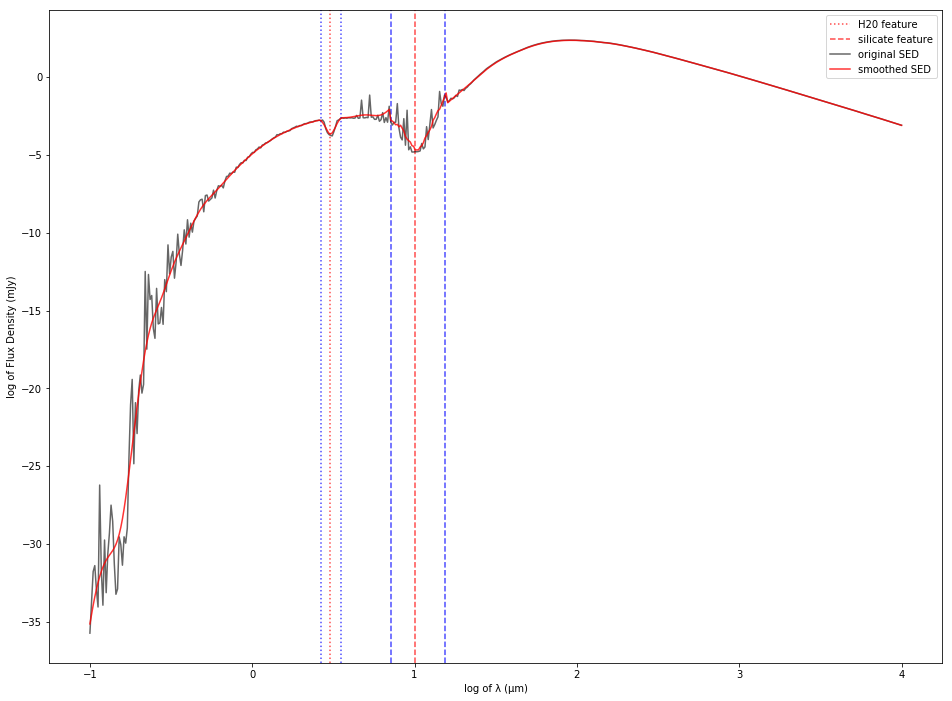

8


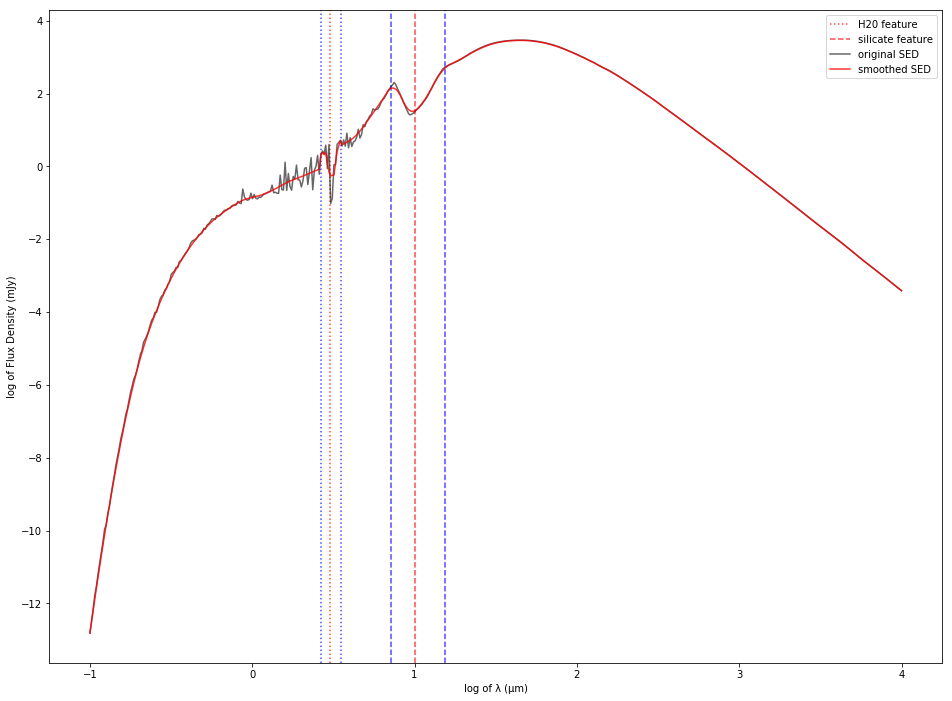

46


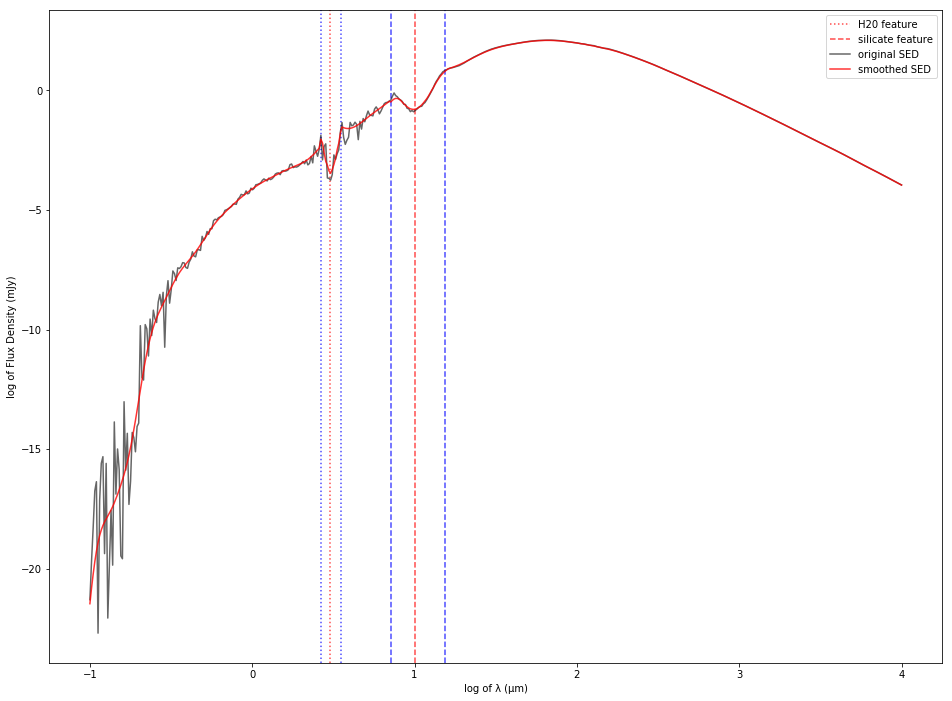

62


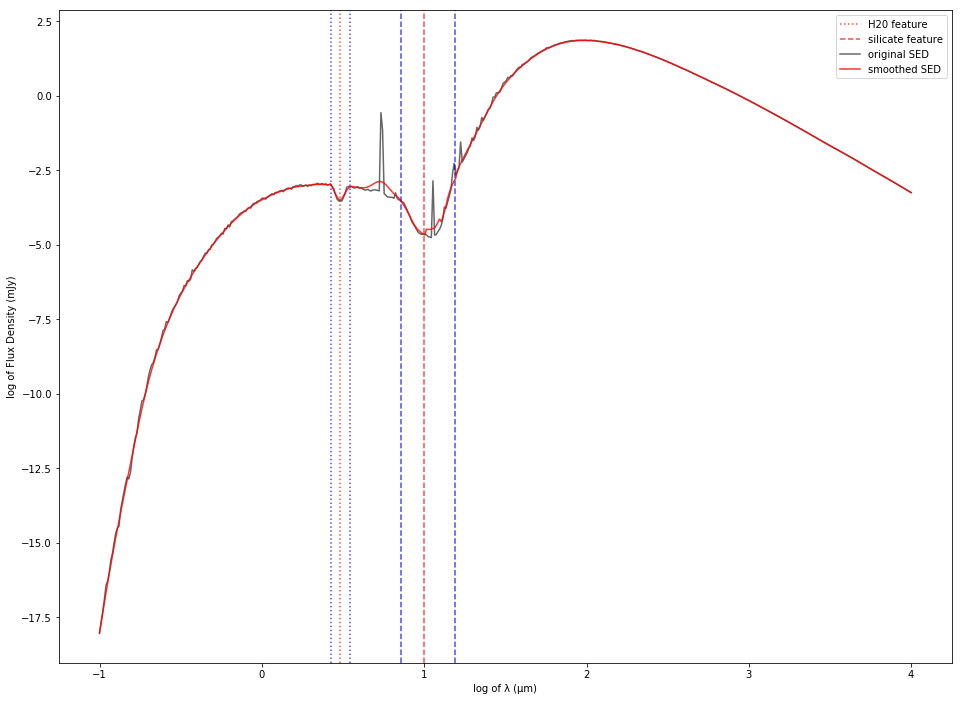

68


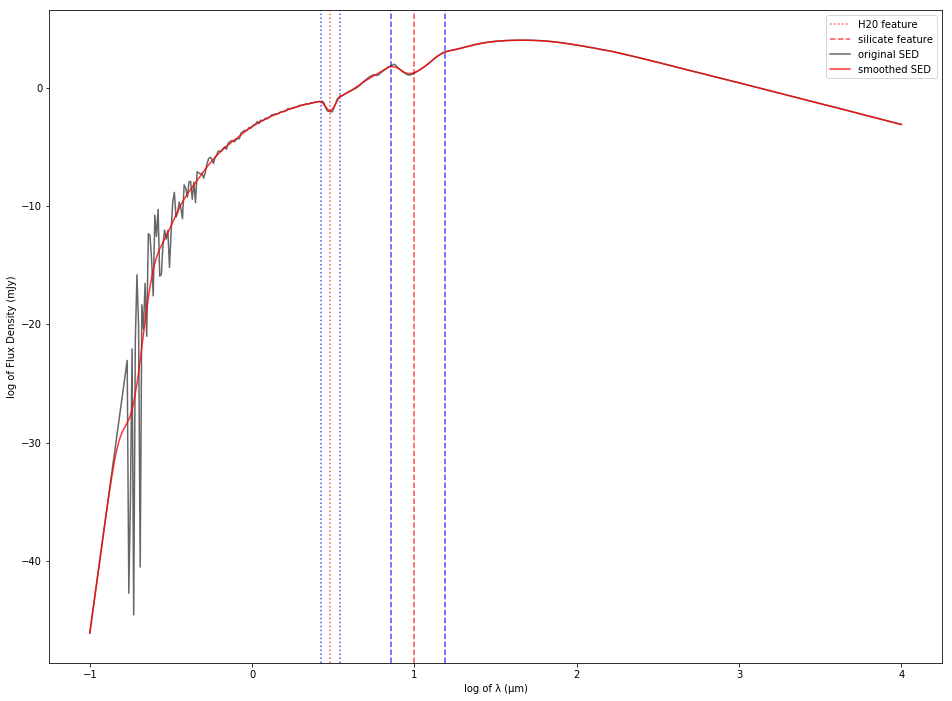

In [36]:
ds=noise
#for i in range(len(ds)):
    #print(ds[i])
    #piece(cube[ds[i]],"g",10,"t",5,"t",9,aout=7,ain=2)
ds=feat
for i in range(len(ds)):
    print(ds[i])
    piece(cube[ds[i]],"g",10,"t",5,"t",4,aout=7,ain=2)
ds=both
for i in range(len(ds)):
    print(ds[i])
    piece(cube[ds[i]],"g",10,"t",5,"t",9,aout=7,ain=2)

In [37]:
def resids(data,ckern,ckernsize,wkern,wkernsize,skern,skernsize,aout,ain):
  
    smooth=[]    
    smooth+=np.ndarray.tolist(np.array(extend_smooth_cut(data[:featlimindex[0]],ckernsize,ckern,a1=aout,a2=aout)))
    smooth+=np.ndarray.tolist(np.array(extend_smooth_cut(data[featlimindex[0]:featlimindex[1]+1],wkernsize,wkern,a1=ain,a2=ain)))
    smooth+=np.ndarray.tolist(np.array(extend_smooth_cut(data[featlimindex[1]+1:featlimindex[2]],ckernsize,ckern,a1=aout,a2=aout)))
    smooth+=np.ndarray.tolist(np.array(extend_smooth_cut(data[featlimindex[2]:featlimindex[3]+1],skernsize,skern,a1=ain,a2=ain)))
    smooth+=np.ndarray.tolist(np.array(extend_smooth_cut(data[featlimindex[3]+1:],ckernsize,ckern,a1=aout,a2=aout)))
    
    return data-smooth

total sd = 0.6915892267458111
section sds =
0.002 0.0 2.24 1.55 0.075


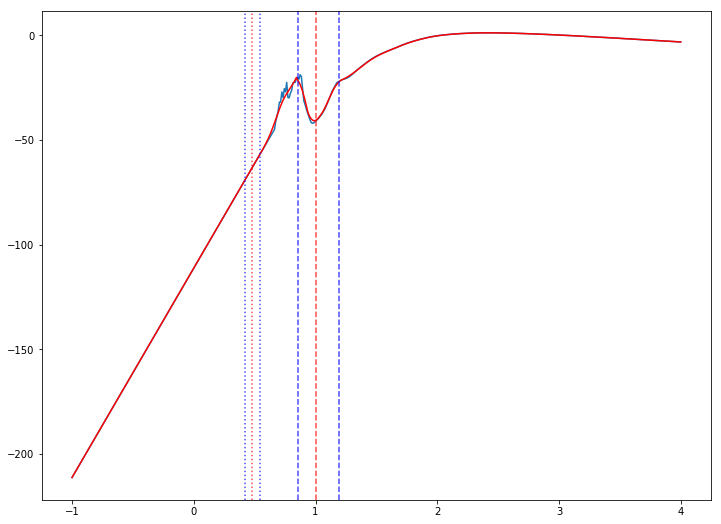

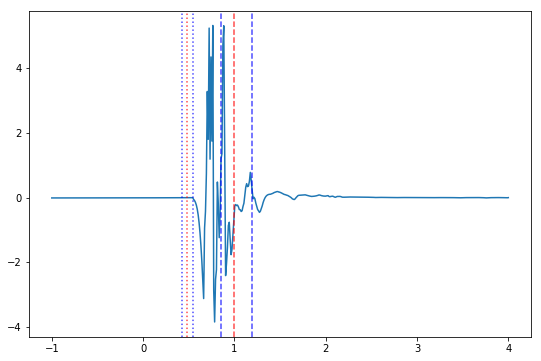

In [49]:
ds=[1483]
for i in range(len(ds)):
    dat=resids(cube[ds[i]],"g",10,"t",5,"t",9,aout=7,ain=2)
    print("total sd = "+str(np.std(dat)))
    print("section sds =")
    print(round(np.std(dat[:featlimindex[0]]),3), round(np.std(dat[featlimindex[0]:featlimindex[1]]),3), \
            round(np.std(dat[featlimindex[1]:featlimindex[2]]),3), round(np.std(dat[featlimindex[2]:featlimindex[3]]),3), \
            round(np.std(dat[featlimindex[3]:]),3))
    
    plt.figure(figsize=(12,9))
    plt.plot(np.log10(xvals),cube[ds[i]])
    plt.plot(np.log10(xvals),cube[ds[i]]-dat,c='r')
    # water feature -- there are features in water ice spectrum at 2.941 and 3.105 microns
    plt.axvline(x=np.mean([np.log10(2.941),np.log10(3.105)]),c='r',linestyle=":",alpha=0.7,label="H20 feature")
    plt.axvline(x=np.log10(2.65),c='b',linestyle=":",alpha=0.7)
    plt.axvline(x=np.log10(3.5),c='b',linestyle=":",alpha=0.7)
    # silicate feature at 10 microns
    plt.axvline(x=np.log10(10.),c='r',linestyle="--",alpha=0.7,label="silicate feature")    
    plt.axvline(x=np.log10(7.2),c='b',linestyle="--",alpha=0.7)
    plt.axvline(x=np.log10(15.5),c='b',linestyle="--",alpha=0.7)
    plt.show()
    
    plt.figure(figsize=(9,6))
    plt.plot(np.log10(xvals),dat)
    # water feature -- there are features in water ice spectrum at 2.941 and 3.105 microns
    plt.axvline(x=np.mean([np.log10(2.941),np.log10(3.105)]),c='r',linestyle=":",alpha=0.7,label="H20 feature")
    plt.axvline(x=np.log10(2.65),c='b',linestyle=":",alpha=0.7)
    plt.axvline(x=np.log10(3.5),c='b',linestyle=":",alpha=0.7)
    # silicate feature at 10 microns
    plt.axvline(x=np.log10(10.),c='r',linestyle="--",alpha=0.7,label="silicate feature")    
    plt.axvline(x=np.log10(7.2),c='b',linestyle="--",alpha=0.7)
    plt.axvline(x=np.log10(15.5),c='b',linestyle="--",alpha=0.7)
    if np.min(dat)>-3 and np.max(dat)<3:
        plt.ylim(-3,3)
    
    plt.show()
    


In [40]:
total=[]
sections=[[],[],[],[],[]]

for i in range(len(cube)):
    res=resids(cube[i],"g",10,"t",5,"t",9,aout=7,ain=2)
    total.append(np.std(res))
    sections[0].append(np.std(res[:featlimindex[0]]))
    sections[1].append(np.std(res[featlimindex[0]:featlimindex[1]]))
    sections[2].append(np.std(res[featlimindex[1]:featlimindex[2]]))
    sections[3].append(np.std(res[featlimindex[2]:featlimindex[3]]))
    sections[4].append(np.std(res[featlimindex[3]:]))

In [146]:
noiselist0=[]
seclimits=[2,3,2,3,1]
ind=0
for i in range(len(cube)):
    noisy=False
    if total[i]>1:
        noisy=True
    if not -np.inf in infcube[i]:
        ind+=1
        if sections[0][i]>seclimits[0]:
            noisy=True
        if sections[1][i]>seclimits[1]:
            noisy=True
    if sections[2][i]>seclimits[2]:
        noisy=True
    if sections[3][i]>seclimits[3]:
        noisy=True
    if sections[4][i]>seclimits[4]:
        noisy=True
    if noisy==True:
        noiselist0.append(i)

In [149]:
np.array(noiselist0).shape

(36,)

68


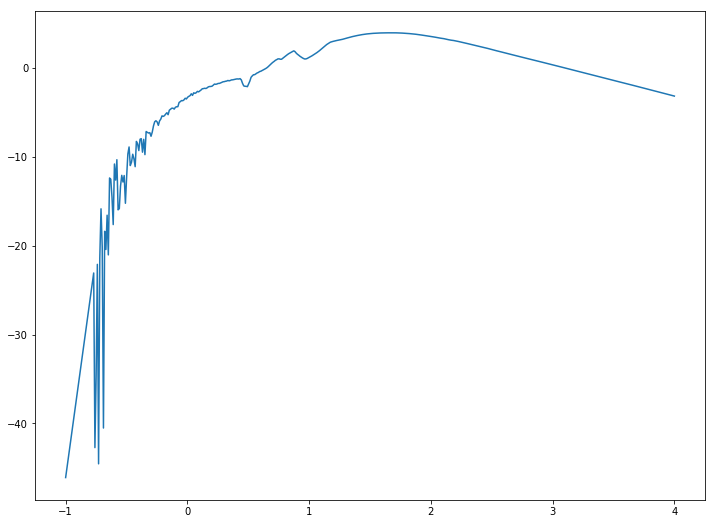

317


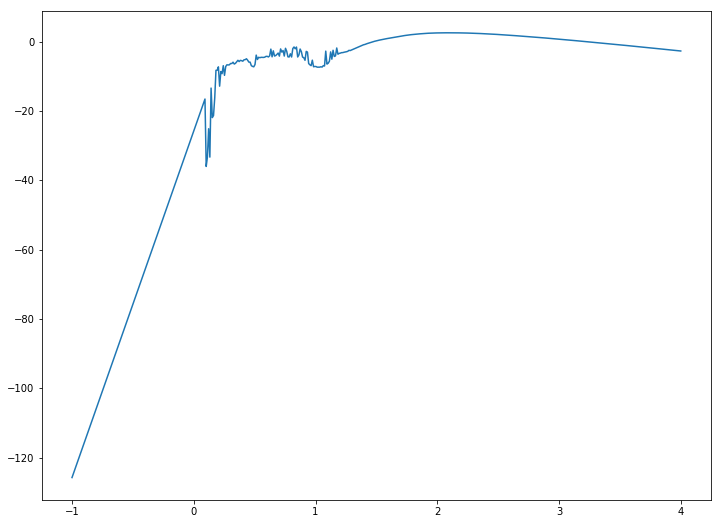

377


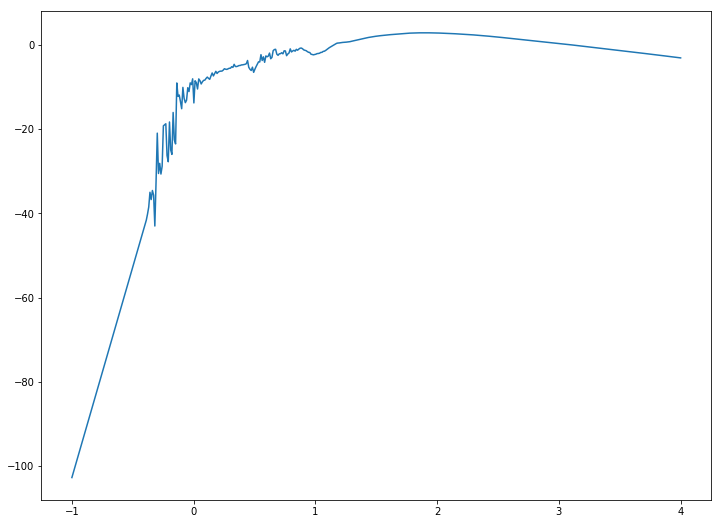

486


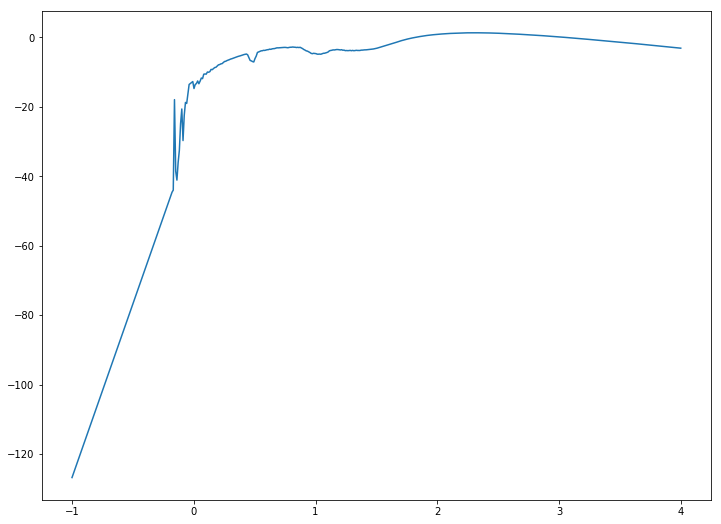

489


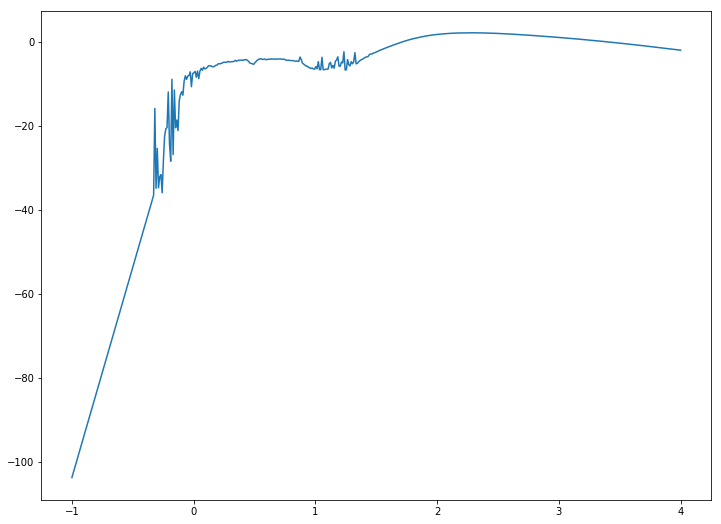

521


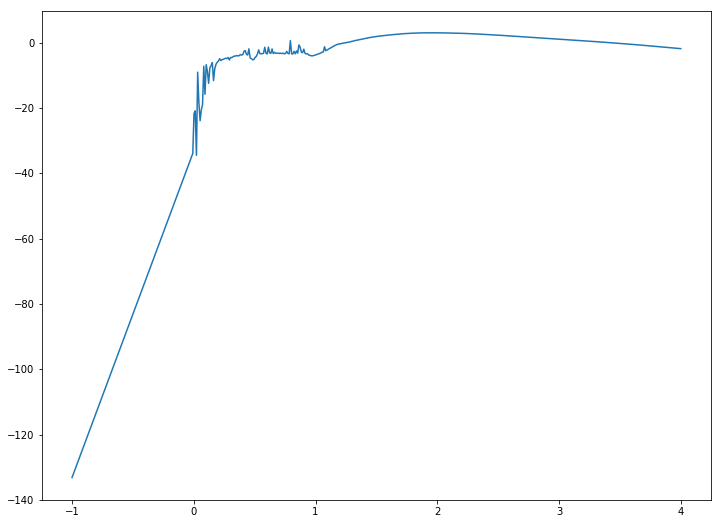

659


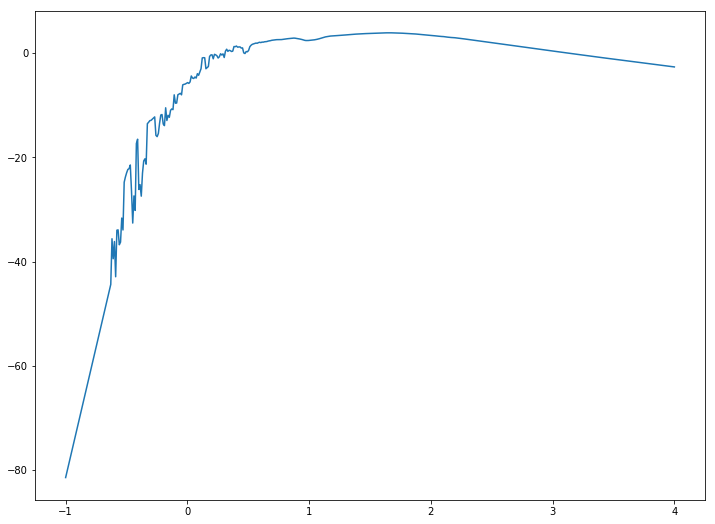

796


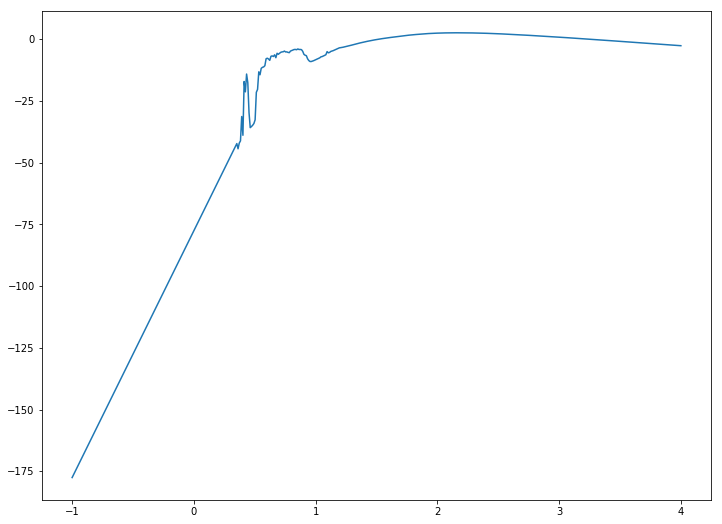

806


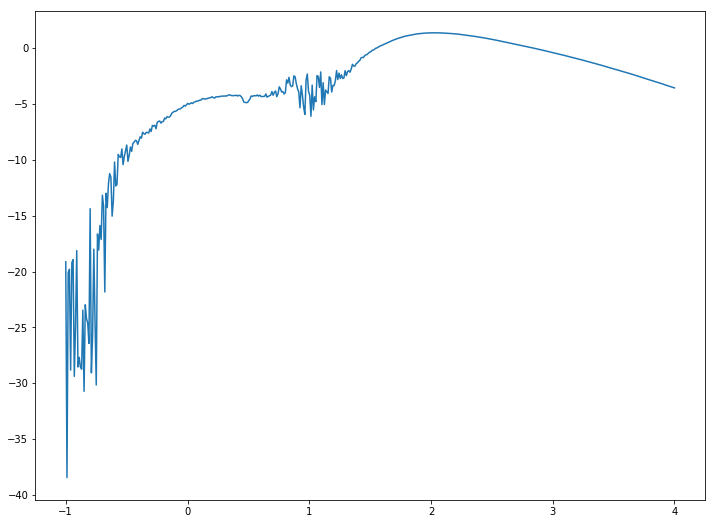

872


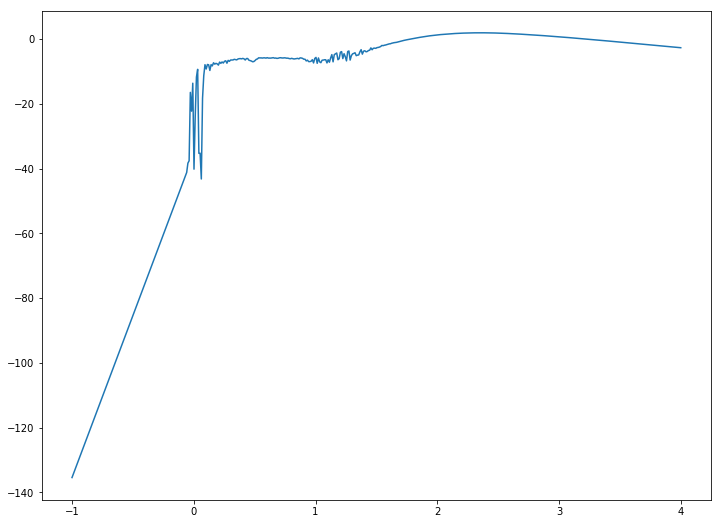

1222


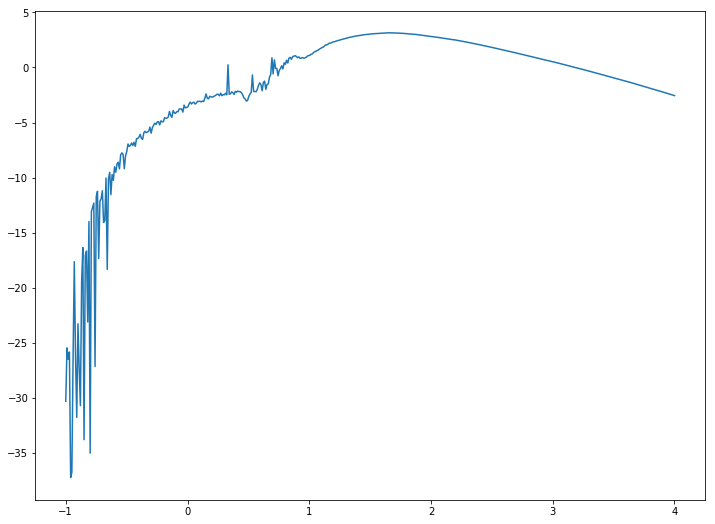

1282


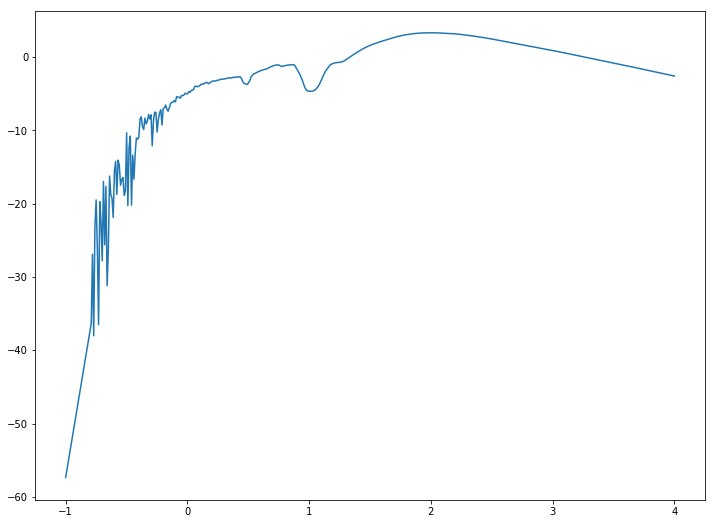

1302


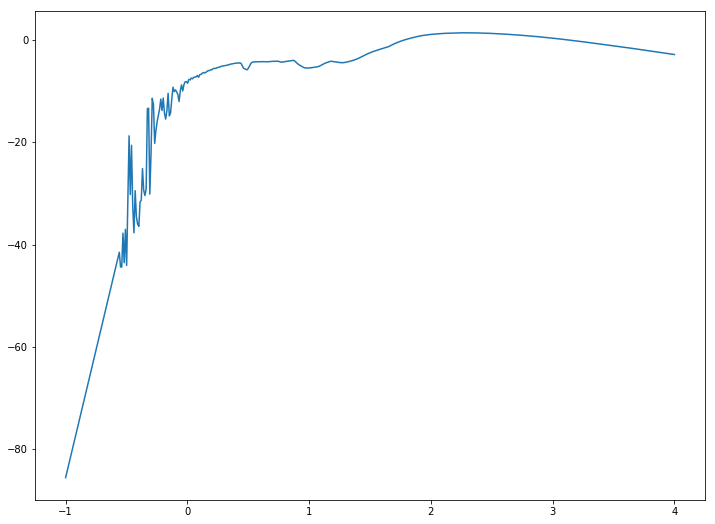

1483


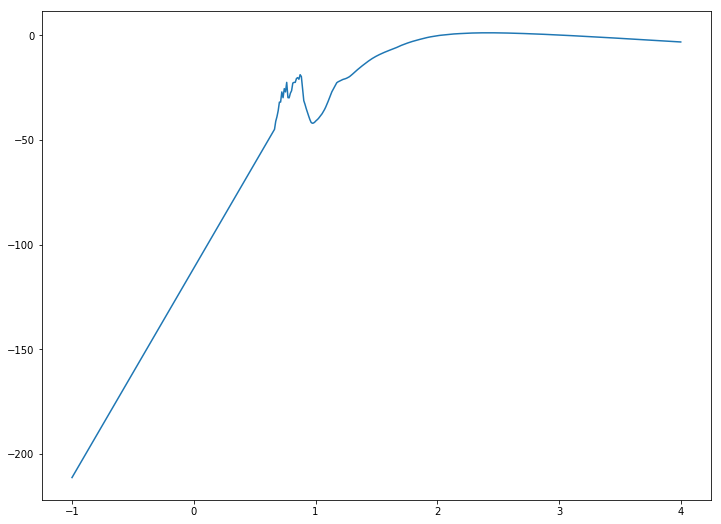

1654


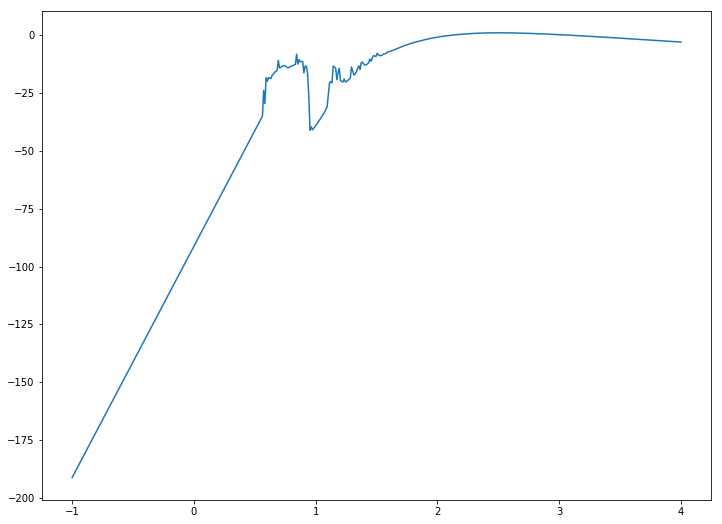

1859


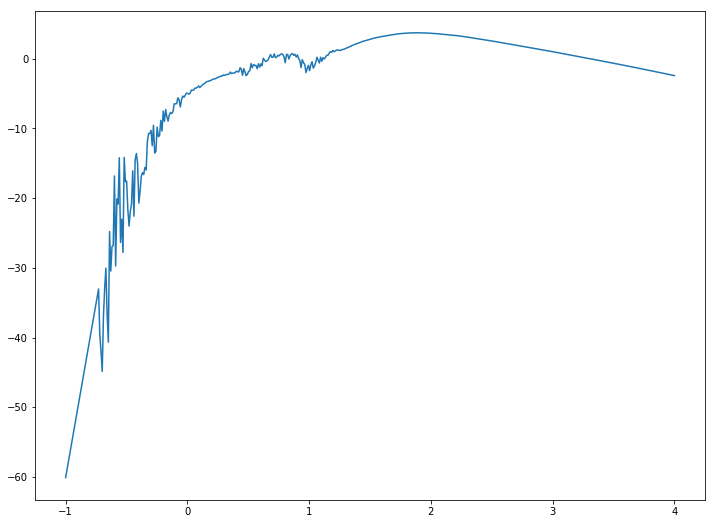

1976


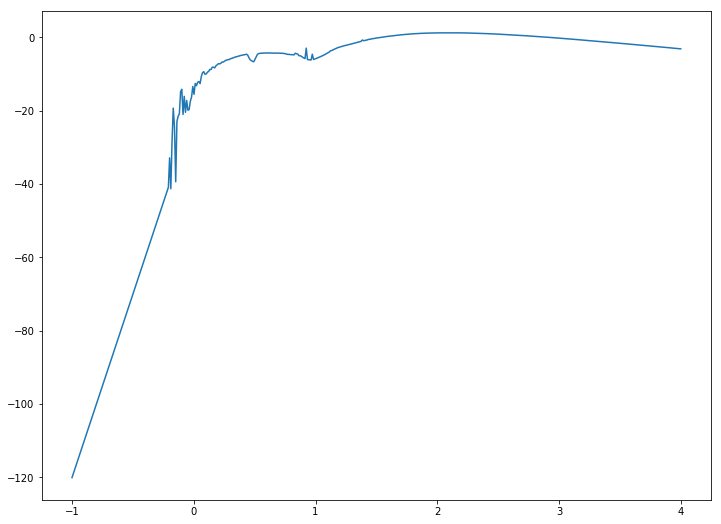

1997


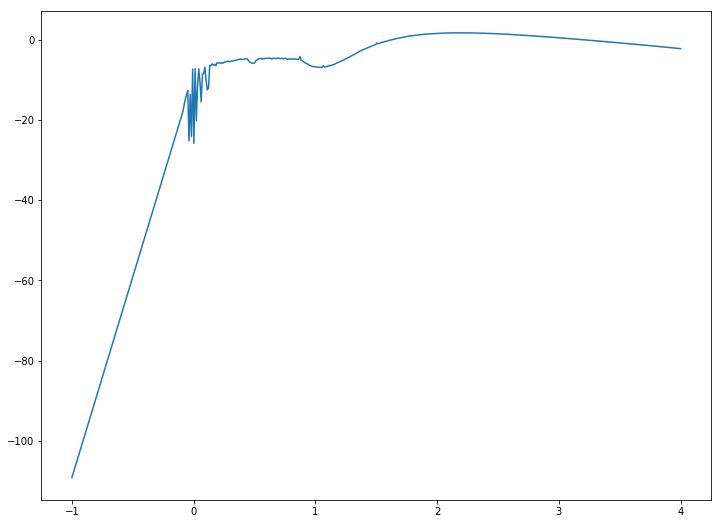

2025


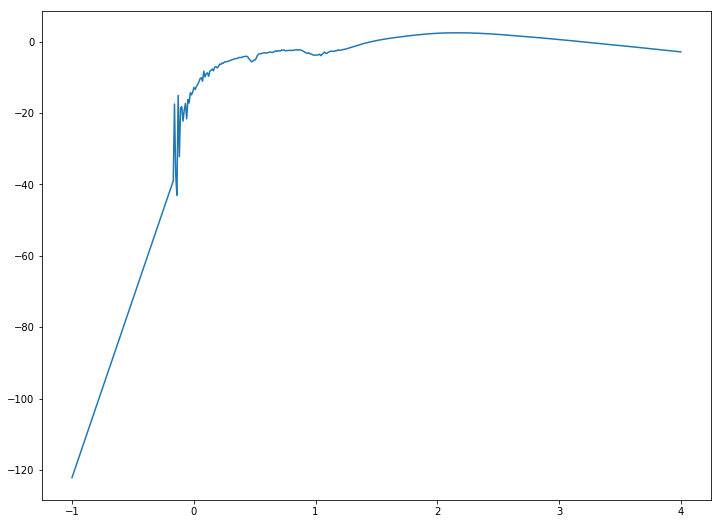

2087


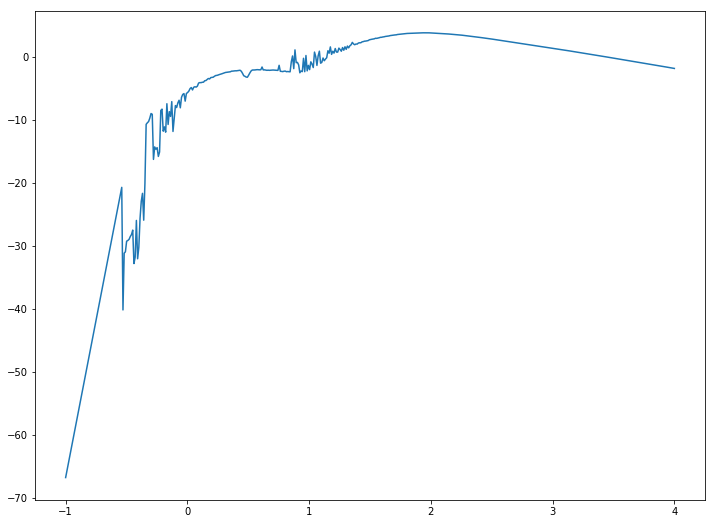

2124


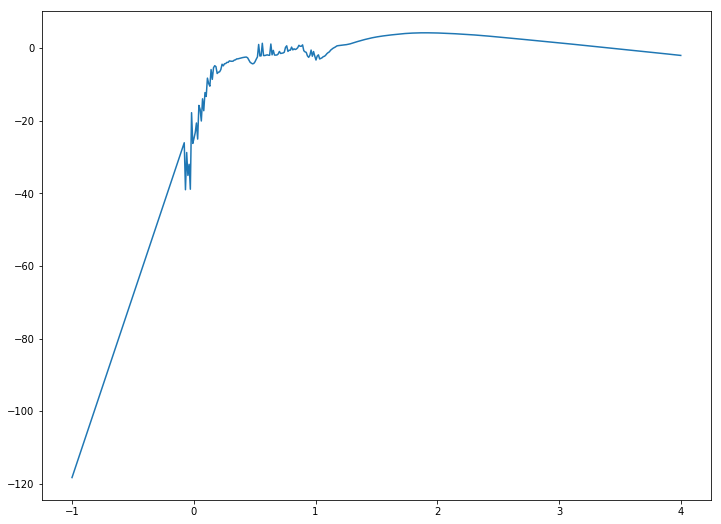

2267


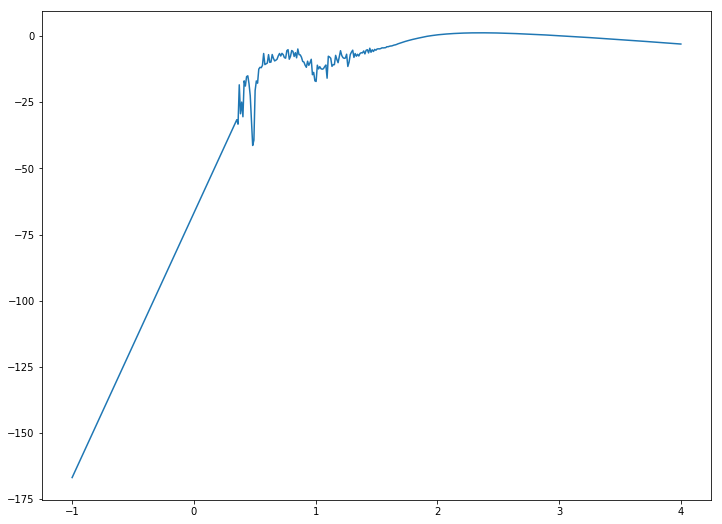

2437


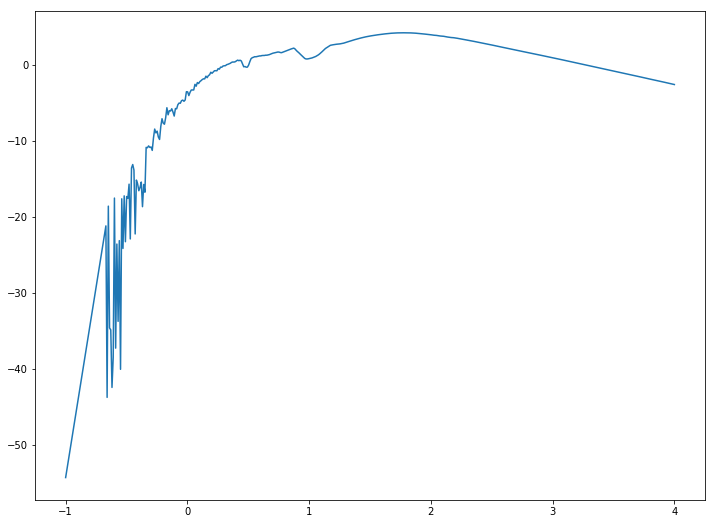

2580


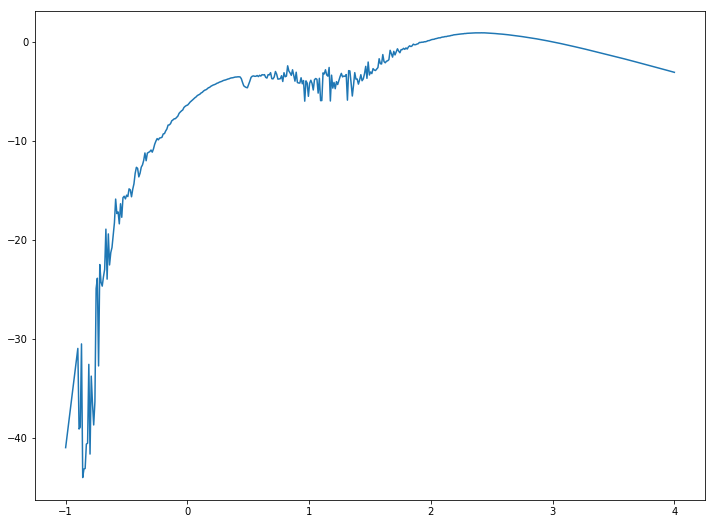

2642


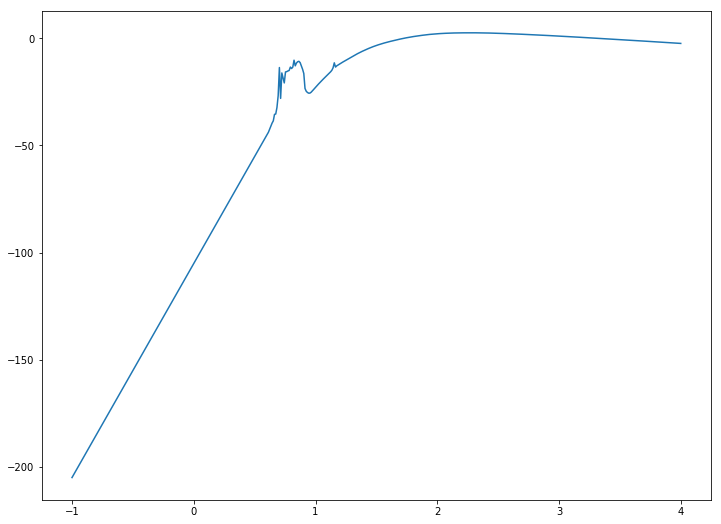

2786


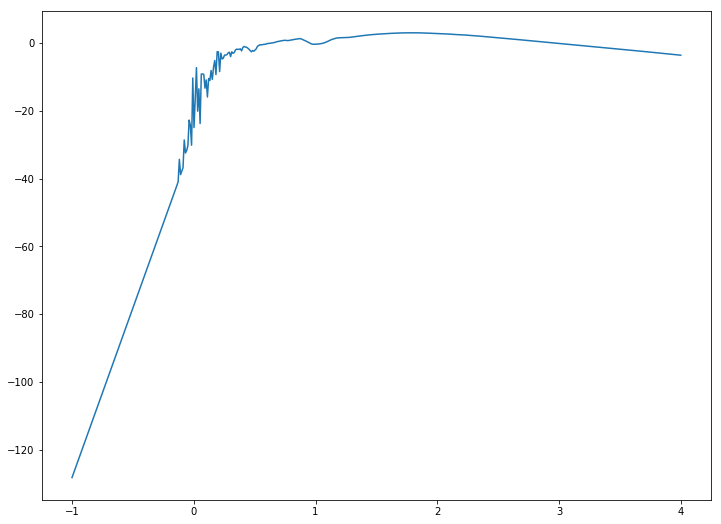

2933


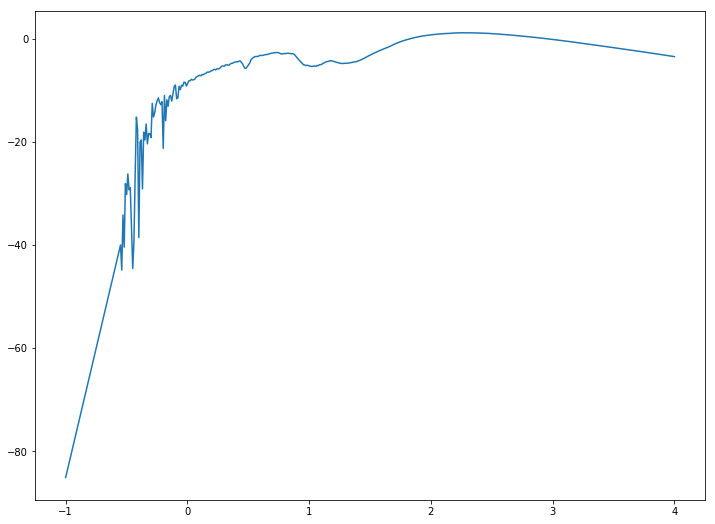

2976


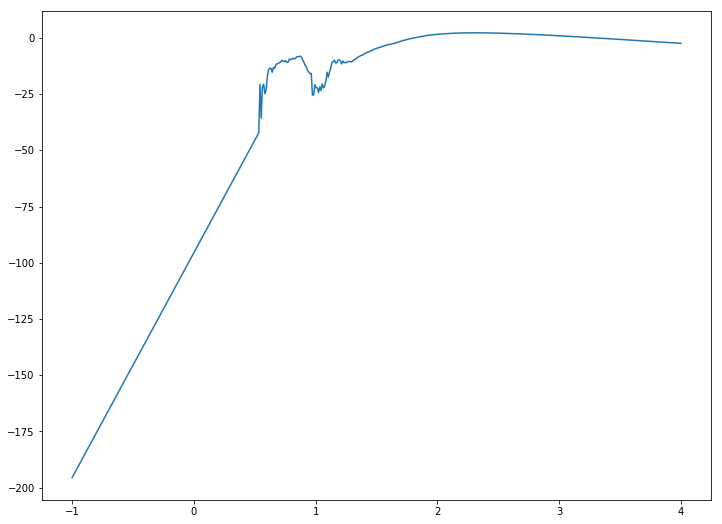

3001


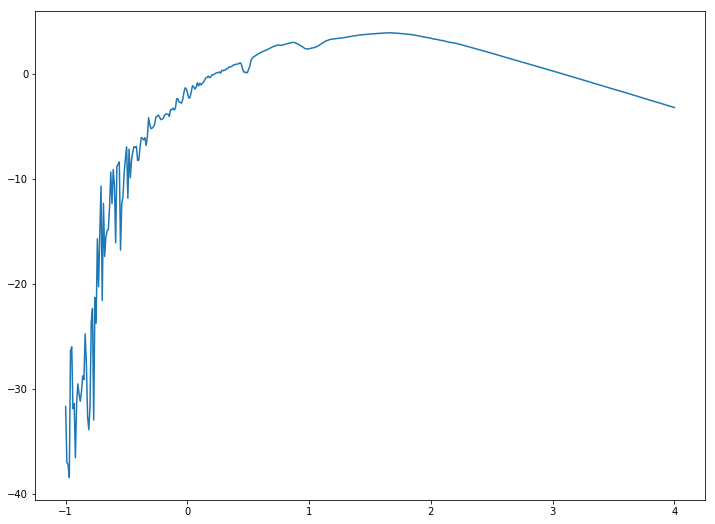

3172


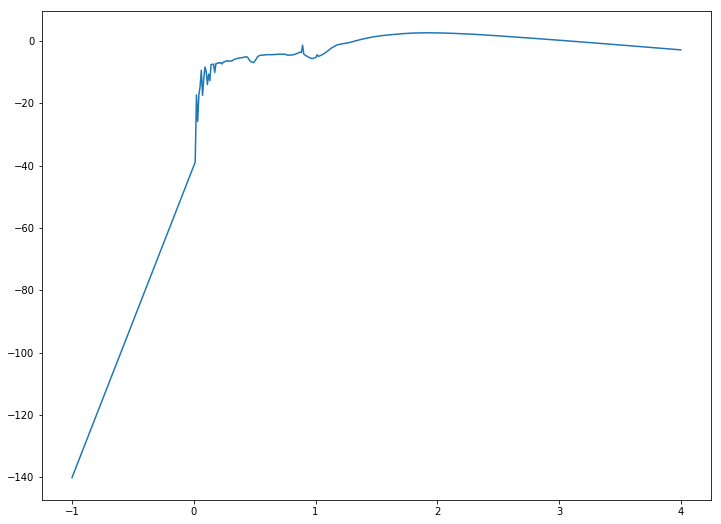

3271


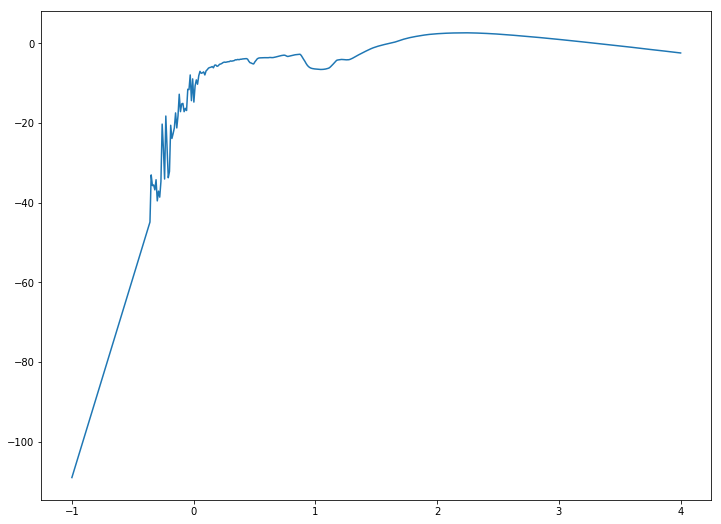

3361


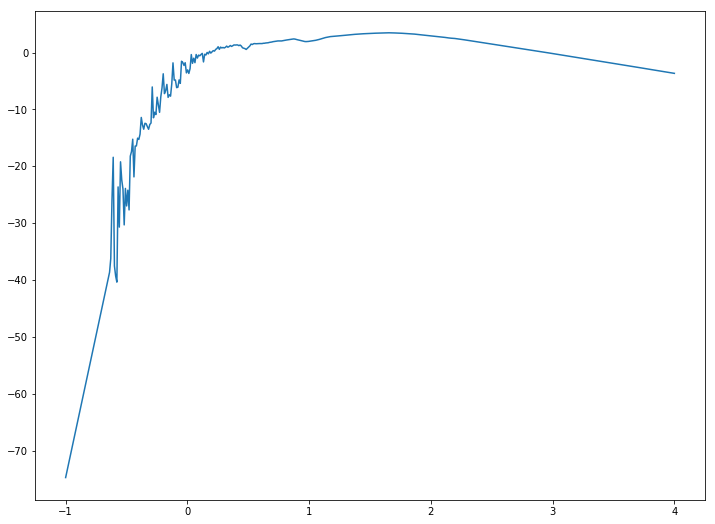

3418


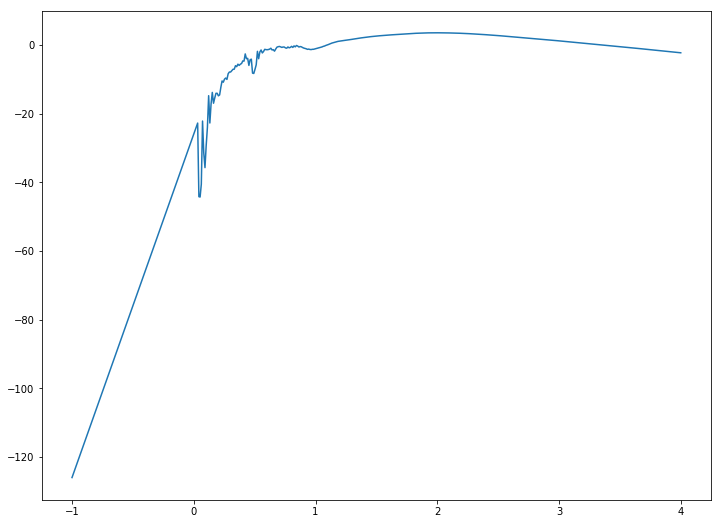

3584


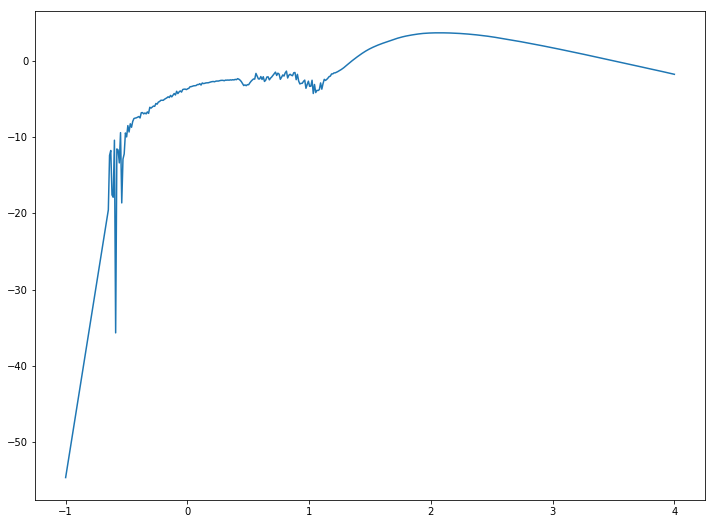

3615


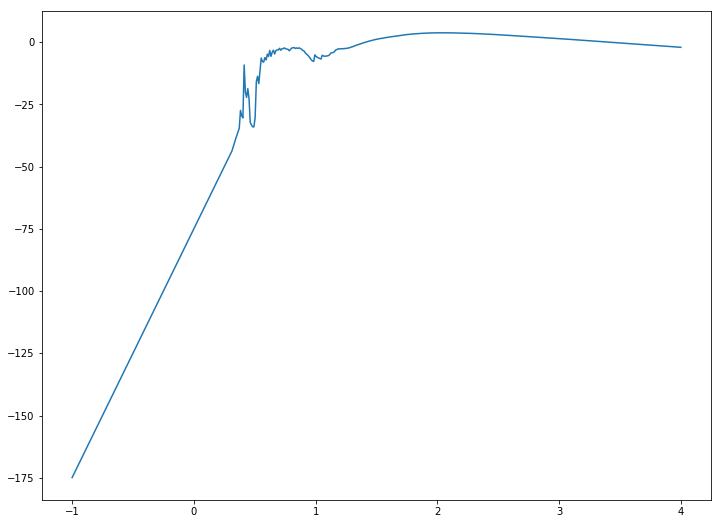

3737


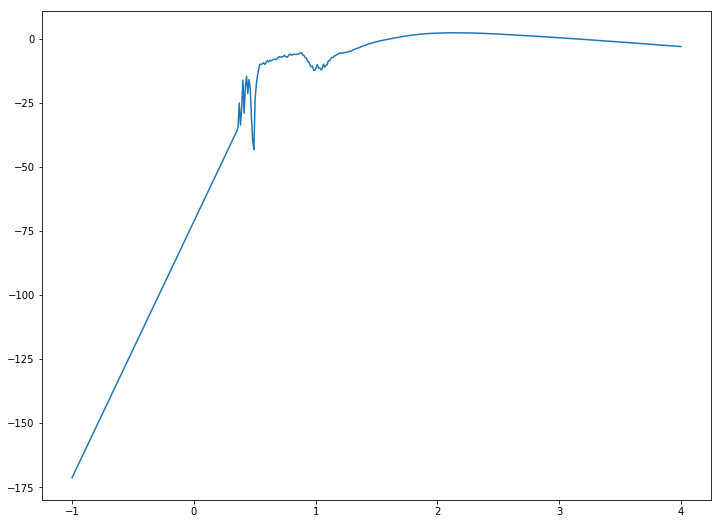

In [148]:
for i in range(len(noiselist0)):
    print(noiselist0[i])
    plt.figure(figsize=(12,9))
    plt.plot(np.log10(xvals),cube[noiselist0[i]])
    plt.show()

In [ ]:
plt.figure(figsize=(12,9))
plt.hist(total,bins=40)
plt.ylim(0,100)
plt.xlim(0,6)
plt.show()

for i in range(len(sections)):
    print(i)
    plt.figure(figsize=(12,9))
    plt.hist(sections[i],bins=40)
    plt.ylim(0,100)
    plt.xlim(0,6)
    plt.show()
